In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
sns.set(rc={'figure.figsize':(10,6)})

In [2]:
train=pd.read_csv('train.csv',sep=';')
test=pd.read_csv('test.csv',sep=';')
bank=pd.concat([train,test],ignore_index=True)

In [3]:
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
bank.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
49722,46,blue-collar,married,secondary,no,668,yes,no,unknown,15,may,1263,2,-1,0,unknown,yes
49723,40,blue-collar,married,secondary,no,1100,yes,no,unknown,29,may,660,2,-1,0,unknown,no
49724,49,blue-collar,married,secondary,no,322,no,no,cellular,14,aug,356,2,-1,0,unknown,no
49725,38,blue-collar,married,secondary,no,1205,yes,no,cellular,20,apr,45,4,153,1,failure,no
49726,32,services,single,secondary,no,473,yes,no,cellular,7,jul,624,5,-1,0,unknown,no
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
49731,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [5]:
bank.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
16865,38,services,married,secondary,no,311,no,yes,cellular,25,jul,114,12,-1,0,unknown,no
45242,31,technician,married,secondary,no,171,no,no,cellular,27,aug,81,3,-1,0,unknown,no
9661,36,blue-collar,married,primary,no,0,yes,no,unknown,6,jun,246,4,-1,0,unknown,no
31091,36,admin.,married,secondary,no,953,yes,no,cellular,17,feb,38,1,-1,0,unknown,no
27842,55,blue-collar,married,secondary,no,93,no,yes,cellular,28,jan,111,1,-1,0,unknown,no
49307,26,entrepreneur,married,tertiary,no,37,yes,yes,cellular,6,may,207,1,363,2,failure,no
2163,40,services,single,secondary,no,888,yes,no,unknown,12,may,169,2,-1,0,unknown,no
24683,44,blue-collar,married,secondary,no,0,yes,no,cellular,17,nov,139,3,-1,0,unknown,no
48943,34,blue-collar,single,secondary,no,79,no,yes,cellular,20,nov,104,1,-1,0,unknown,no
26340,35,blue-collar,single,secondary,no,448,no,yes,cellular,20,nov,1031,6,-1,0,unknown,no


In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.5+ MB


In [7]:
category = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','day','month','poutcome', 'y']
bank[category] = bank[category].astype('category')

In [8]:
numeric = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

In [9]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        49732 non-null  int64   
 1   job        49732 non-null  category
 2   marital    49732 non-null  category
 3   education  49732 non-null  category
 4   default    49732 non-null  category
 5   balance    49732 non-null  int64   
 6   housing    49732 non-null  category
 7   loan       49732 non-null  category
 8   contact    49732 non-null  category
 9   day        49732 non-null  category
 10  month      49732 non-null  category
 11  duration   49732 non-null  int64   
 12  campaign   49732 non-null  int64   
 13  pdays      49732 non-null  int64   
 14  previous   49732 non-null  int64   
 15  poutcome   49732 non-null  category
 16  y          49732 non-null  category
dtypes: category(11), int64(6)
memory usage: 2.8 MB


In [10]:
bank.describe()

,age,balance,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
bank.describe(include = 'category')

,job,marital,education,default,housing,loan,contact,day,month,poutcome,y
count,49732,49732,49732,49732,49732,49732,49732,49732,49732,49732,49732
unique,12,3,4,2,2,2,3,31,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,20,may,unknown,no
freq,10678,30011,25508,48841,27689,41797,32181,3009,15164,40664,43922


In [12]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<AxesSubplot:>

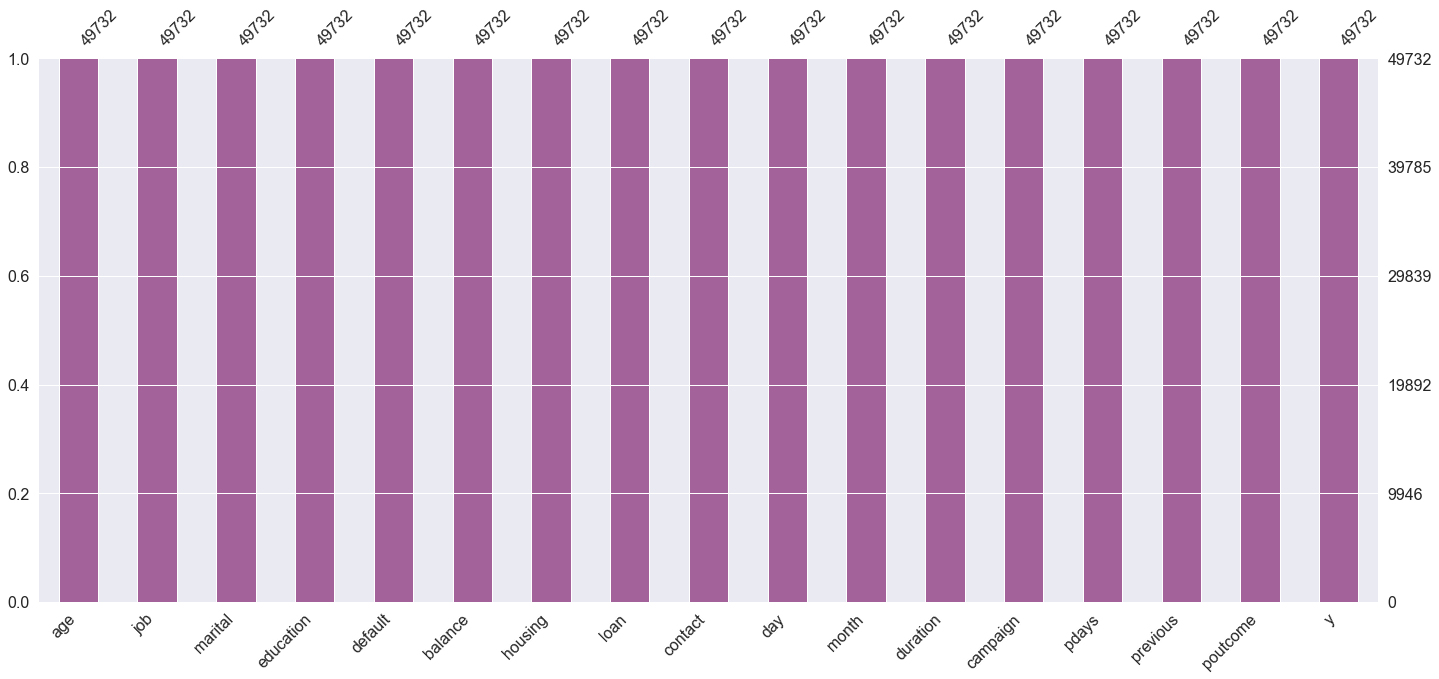

In [13]:
msno.bar(bank, color='#a3629a')

In [14]:
bank[numeric].nunique()

age           77
balance     7168
duration    1573
campaign      48
pdays        559
previous      41
dtype: int64

In [15]:
bank[category].nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
day          31
month        12
poutcome      4
y             2
dtype: int64

## Distribution of numeric

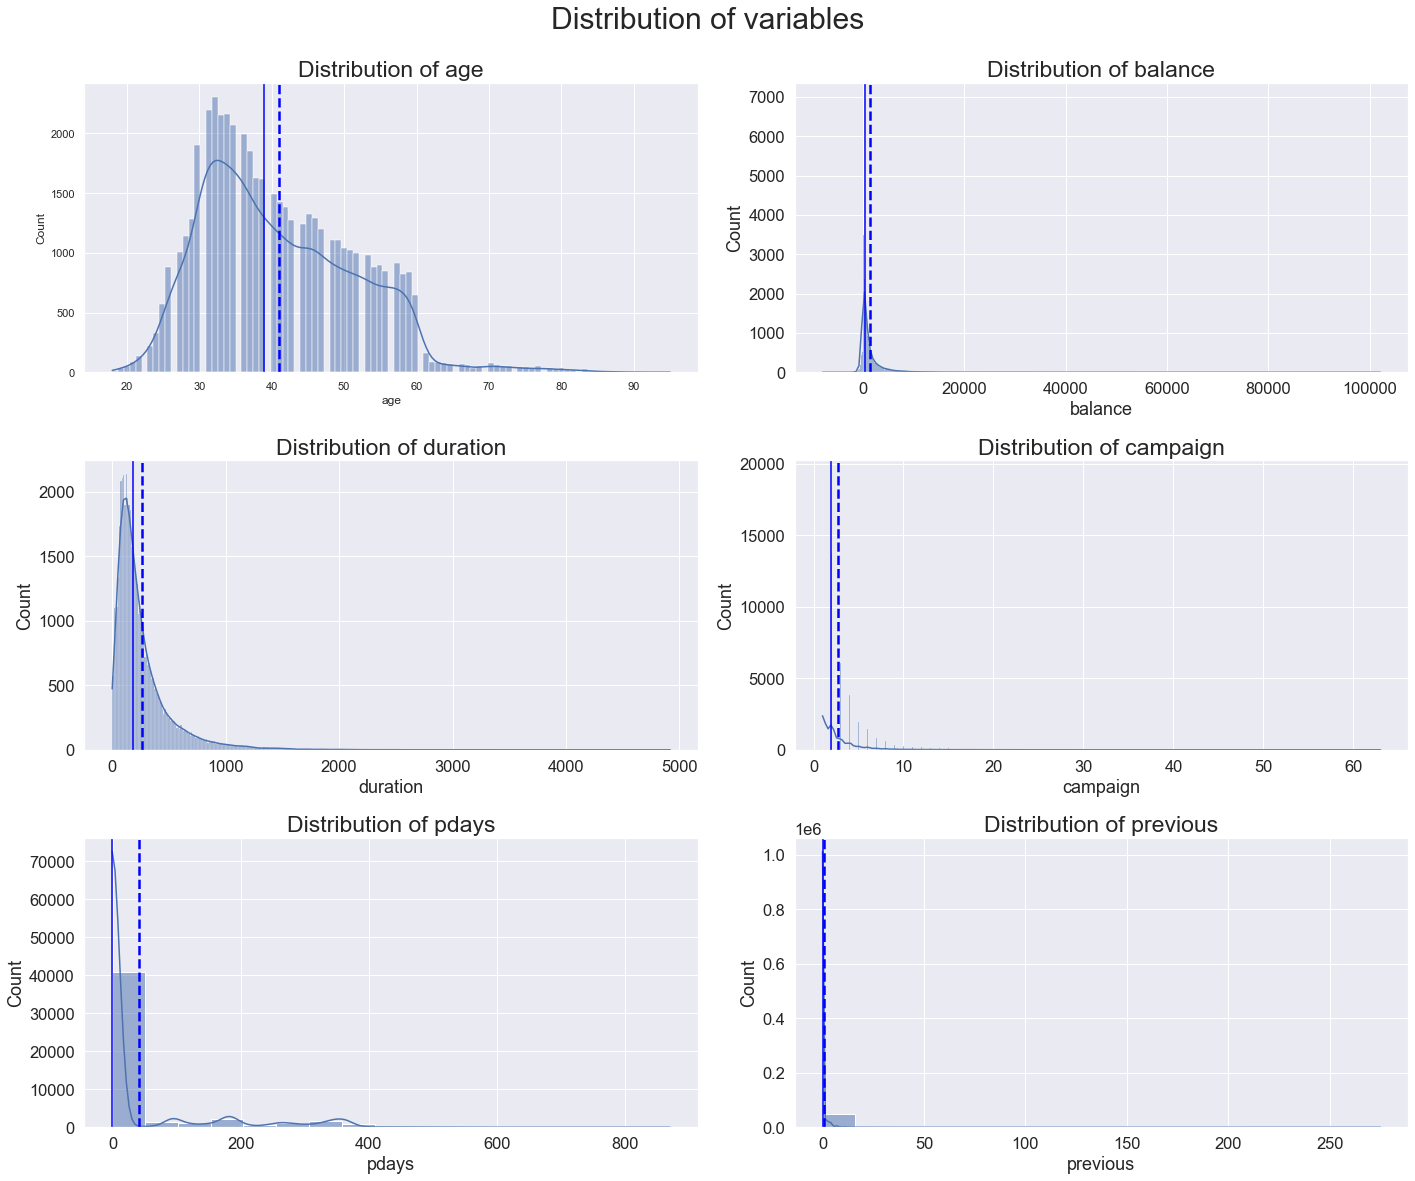

In [16]:
n=1
plt.subplots(figsize=(20, 16))
for i in numeric:
    plt.subplot(3,2,n)
    ax = plt.gca()
    sns.set(font_scale = 1.5)
    sns.histplot(bank[i],kde=True, palette='Set3')    
    ax.set_title('Distribution of %s'%(i), fontsize=23)
    plt.axvline(x=bank[i].mean(),ls='--',lw=2.5, color='blue',label='mean')
    plt.axvline(x=bank[i].median(), color='blue',label='medain')
    n+=1 
    plt.tight_layout()
plt.suptitle('Distribution of variables', y=1.03, fontsize=30)
plt.show()


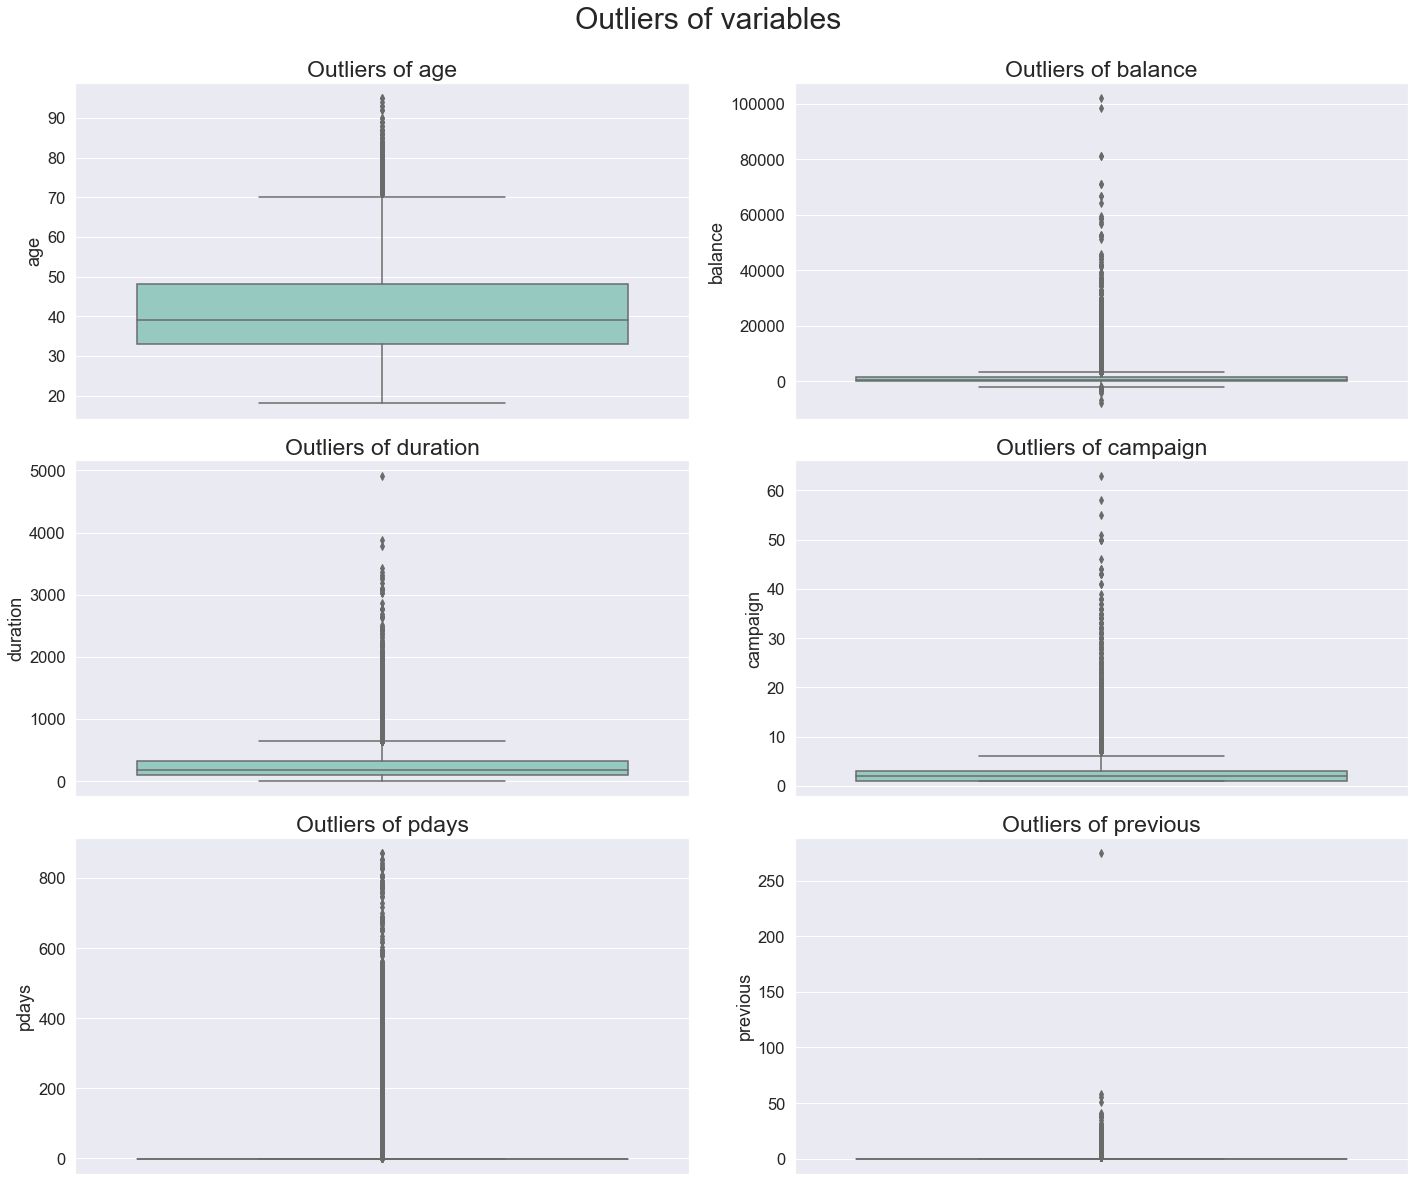

In [17]:
n=1
plt.subplots(figsize=(20, 16))
for i in numeric:
    plt.subplot(3,2,n)
    ax = plt.gca()
    sns.set(font_scale = 1.5)
    sns.boxplot(y=bank[i], palette='Set3')    
    ax.set_title('Outliers of %s'%(i), fontsize=23)
    n+=1 
    plt.tight_layout()
plt.suptitle('Outliers of variables', y=1.03, fontsize=30)
plt.show()


In [18]:
bank[numeric].skew()

age          0.686033
balance      8.204429
duration     3.109530
campaign     4.884266
pdays        2.624838
previous    40.783648
dtype: float64

In [19]:
numeric

['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

In [20]:
data_transform = [ 'balance', 'duration', 'campaign', 'pdays', 'previous']

In [21]:
bank_log = bank.copy(deep=True)
for i in data_transform:
    bank_log[i] = np.log(bank_log[i]+1)
bank_log[numeric].skew()

C:\Users\Rhytham\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Rhytham\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


age         0.686033
balance          NaN
duration   -0.455335
campaign    1.324308
pdays            NaN
previous    2.511950
dtype: float64

In [22]:
bank_sqrt = bank.copy(deep=True)
for i in data_transform:
    bank_sqrt[i] = np.sqrt(bank_sqrt[i])
bank_sqrt[numeric].skew()

C:\Users\Rhytham\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


age         0.686033
balance     1.885586
duration    1.165189
campaign    2.201397
pdays      -0.284698
previous    2.850686
dtype: float64

In [23]:
bank_cbrt = bank.copy(deep=True)
for i in data_transform:
    bank_cbrt[i] = np.cbrt(bank_cbrt[i])
bank_cbrt[numeric].skew()

age         0.686033
balance    -0.076314
duration    0.634772
campaign    1.649735
pdays       1.763555
previous    2.053087
dtype: float64

In [24]:
bank1 = bank_cbrt.copy(deep=True)

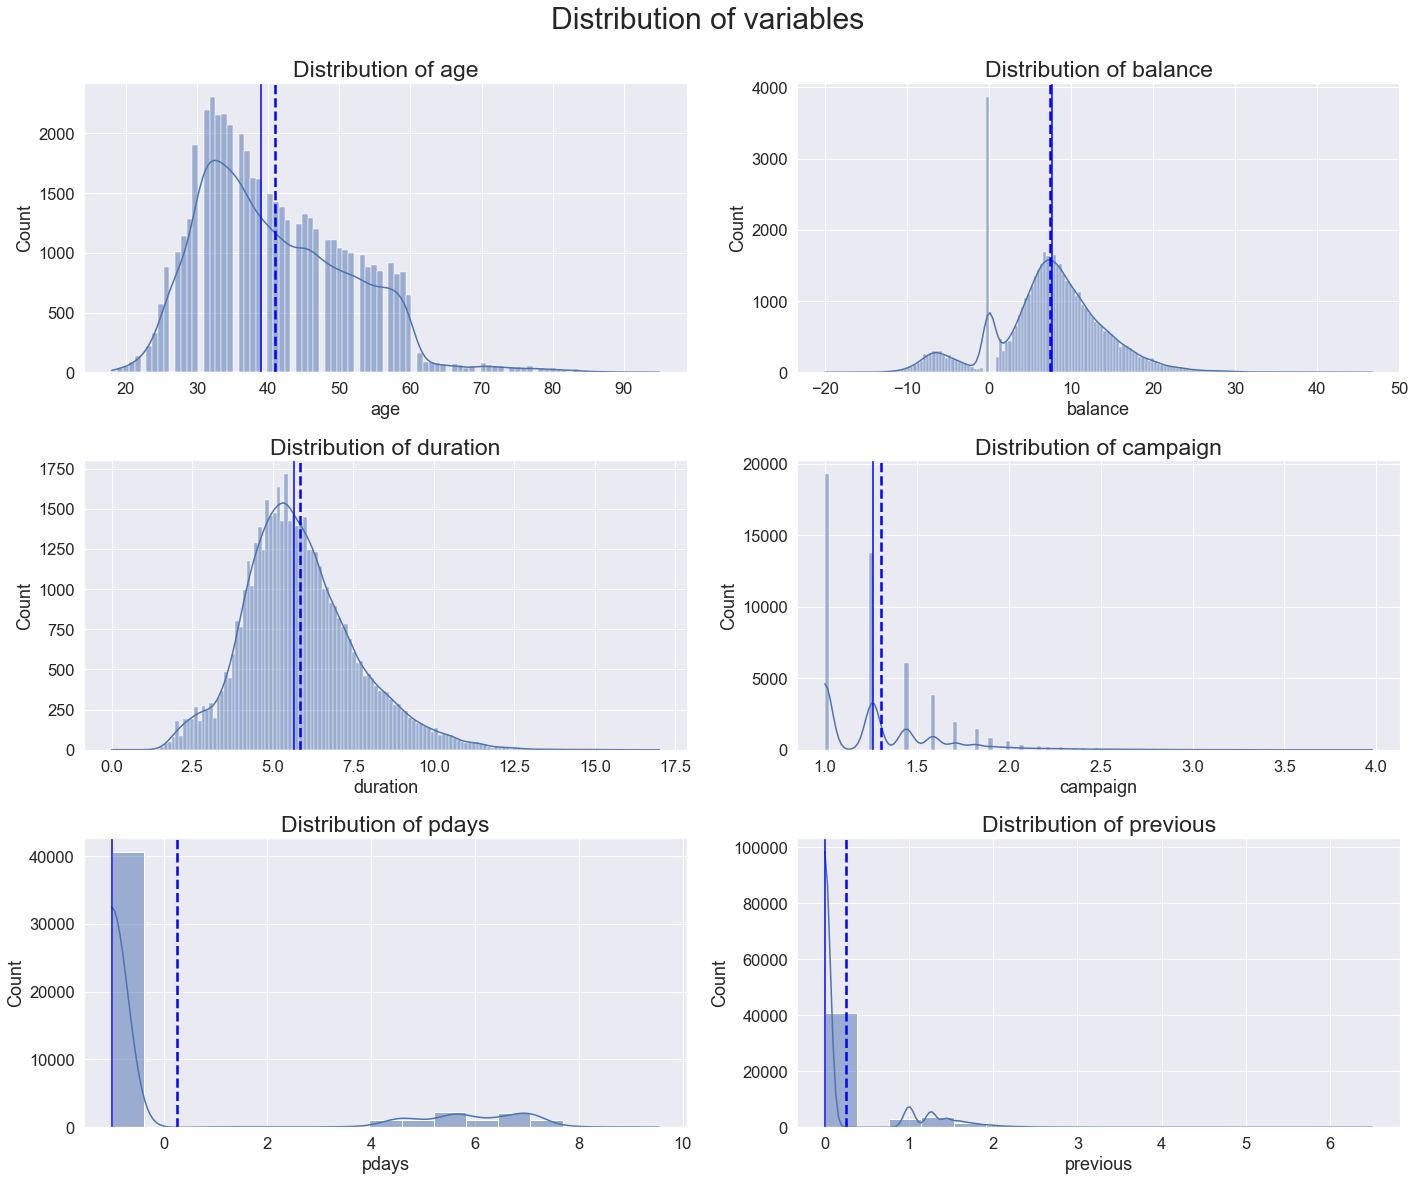

In [25]:
n=1
plt.subplots(figsize=(20, 16))
for i in numeric:
    plt.subplot(3,2,n)
    ax = plt.gca()
    sns.set(font_scale = 1.5)
    sns.histplot(bank1[i],kde=True, palette='Set3')    
    ax.set_title('Distribution of %s'%(i), fontsize=23)
    plt.axvline(x=bank1[i].mean(),ls='--',lw=2.5, color='blue',label='mean')
    plt.axvline(x=bank1[i].median(), color='blue',label='medain')
    n+=1 
    plt.tight_layout()
plt.suptitle('Distribution of variables', y=1.03, fontsize=30)
plt.show()


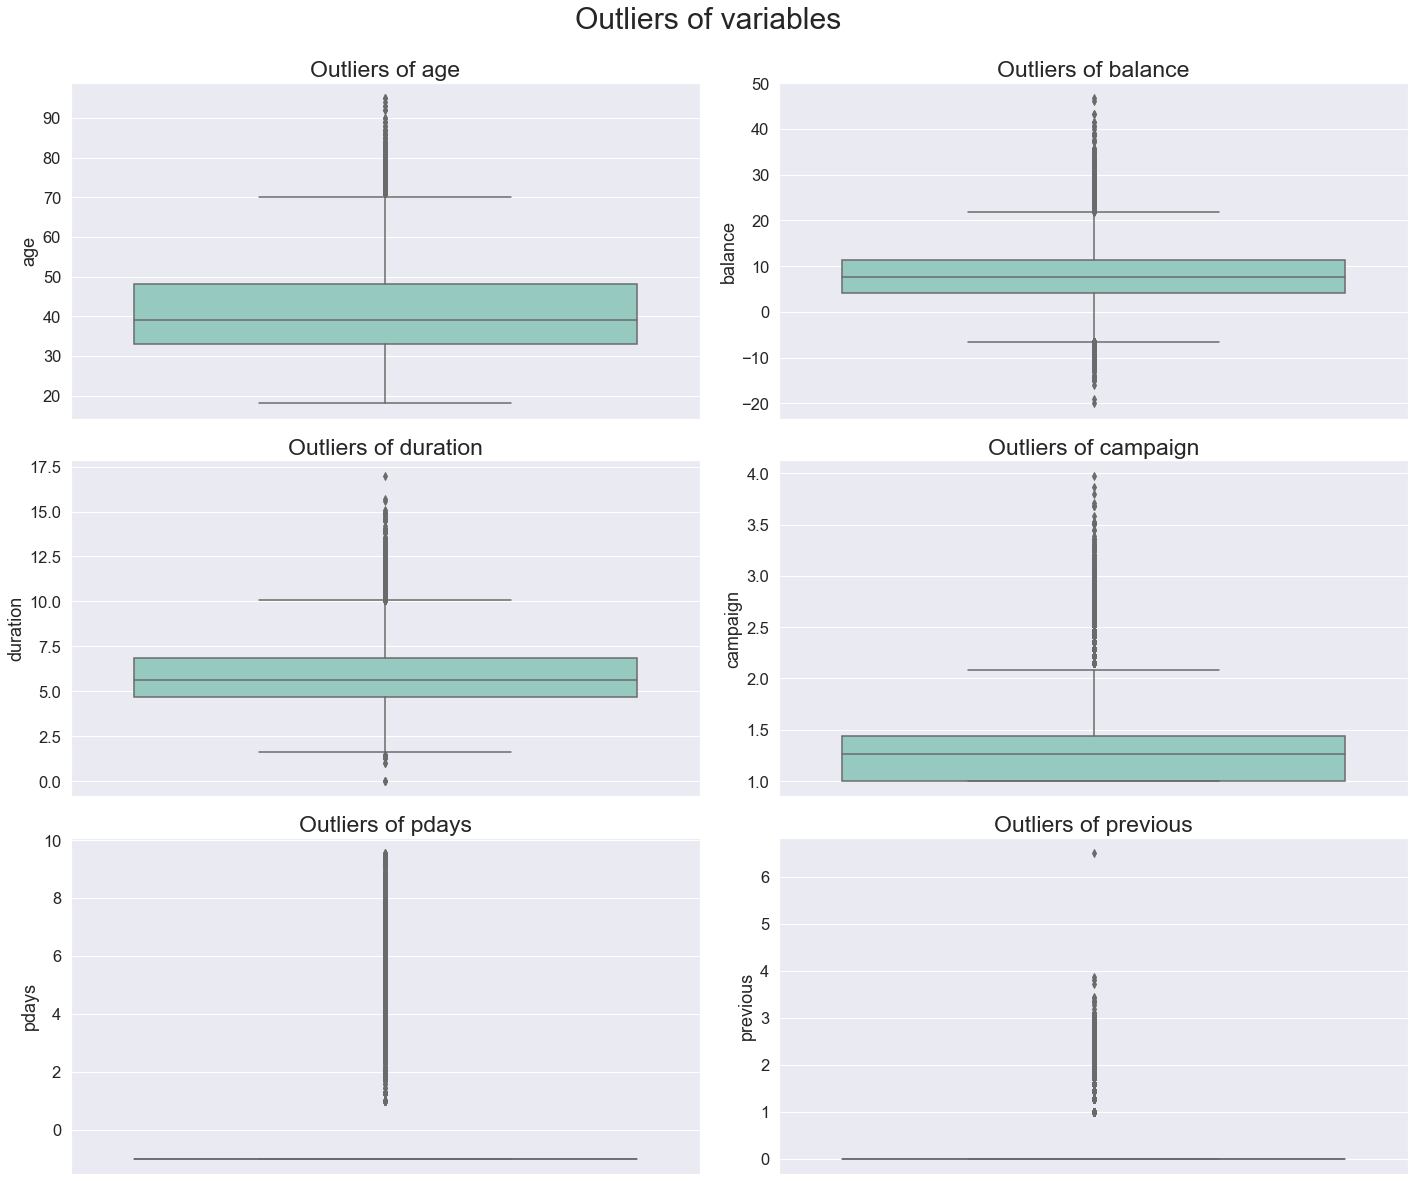

In [26]:
n=1
plt.subplots(figsize=(20, 16))
for i in numeric:
    plt.subplot(3,2,n)
    ax = plt.gca()
    sns.set(font_scale = 1.5)
    sns.boxplot(y=bank1[i], palette='Set3')    
    ax.set_title('Outliers of %s'%(i), fontsize=23)
    n+=1 
    plt.tight_layout()
plt.suptitle('Outliers of variables', y=1.03, fontsize=30)
plt.show()


## Distribution of category

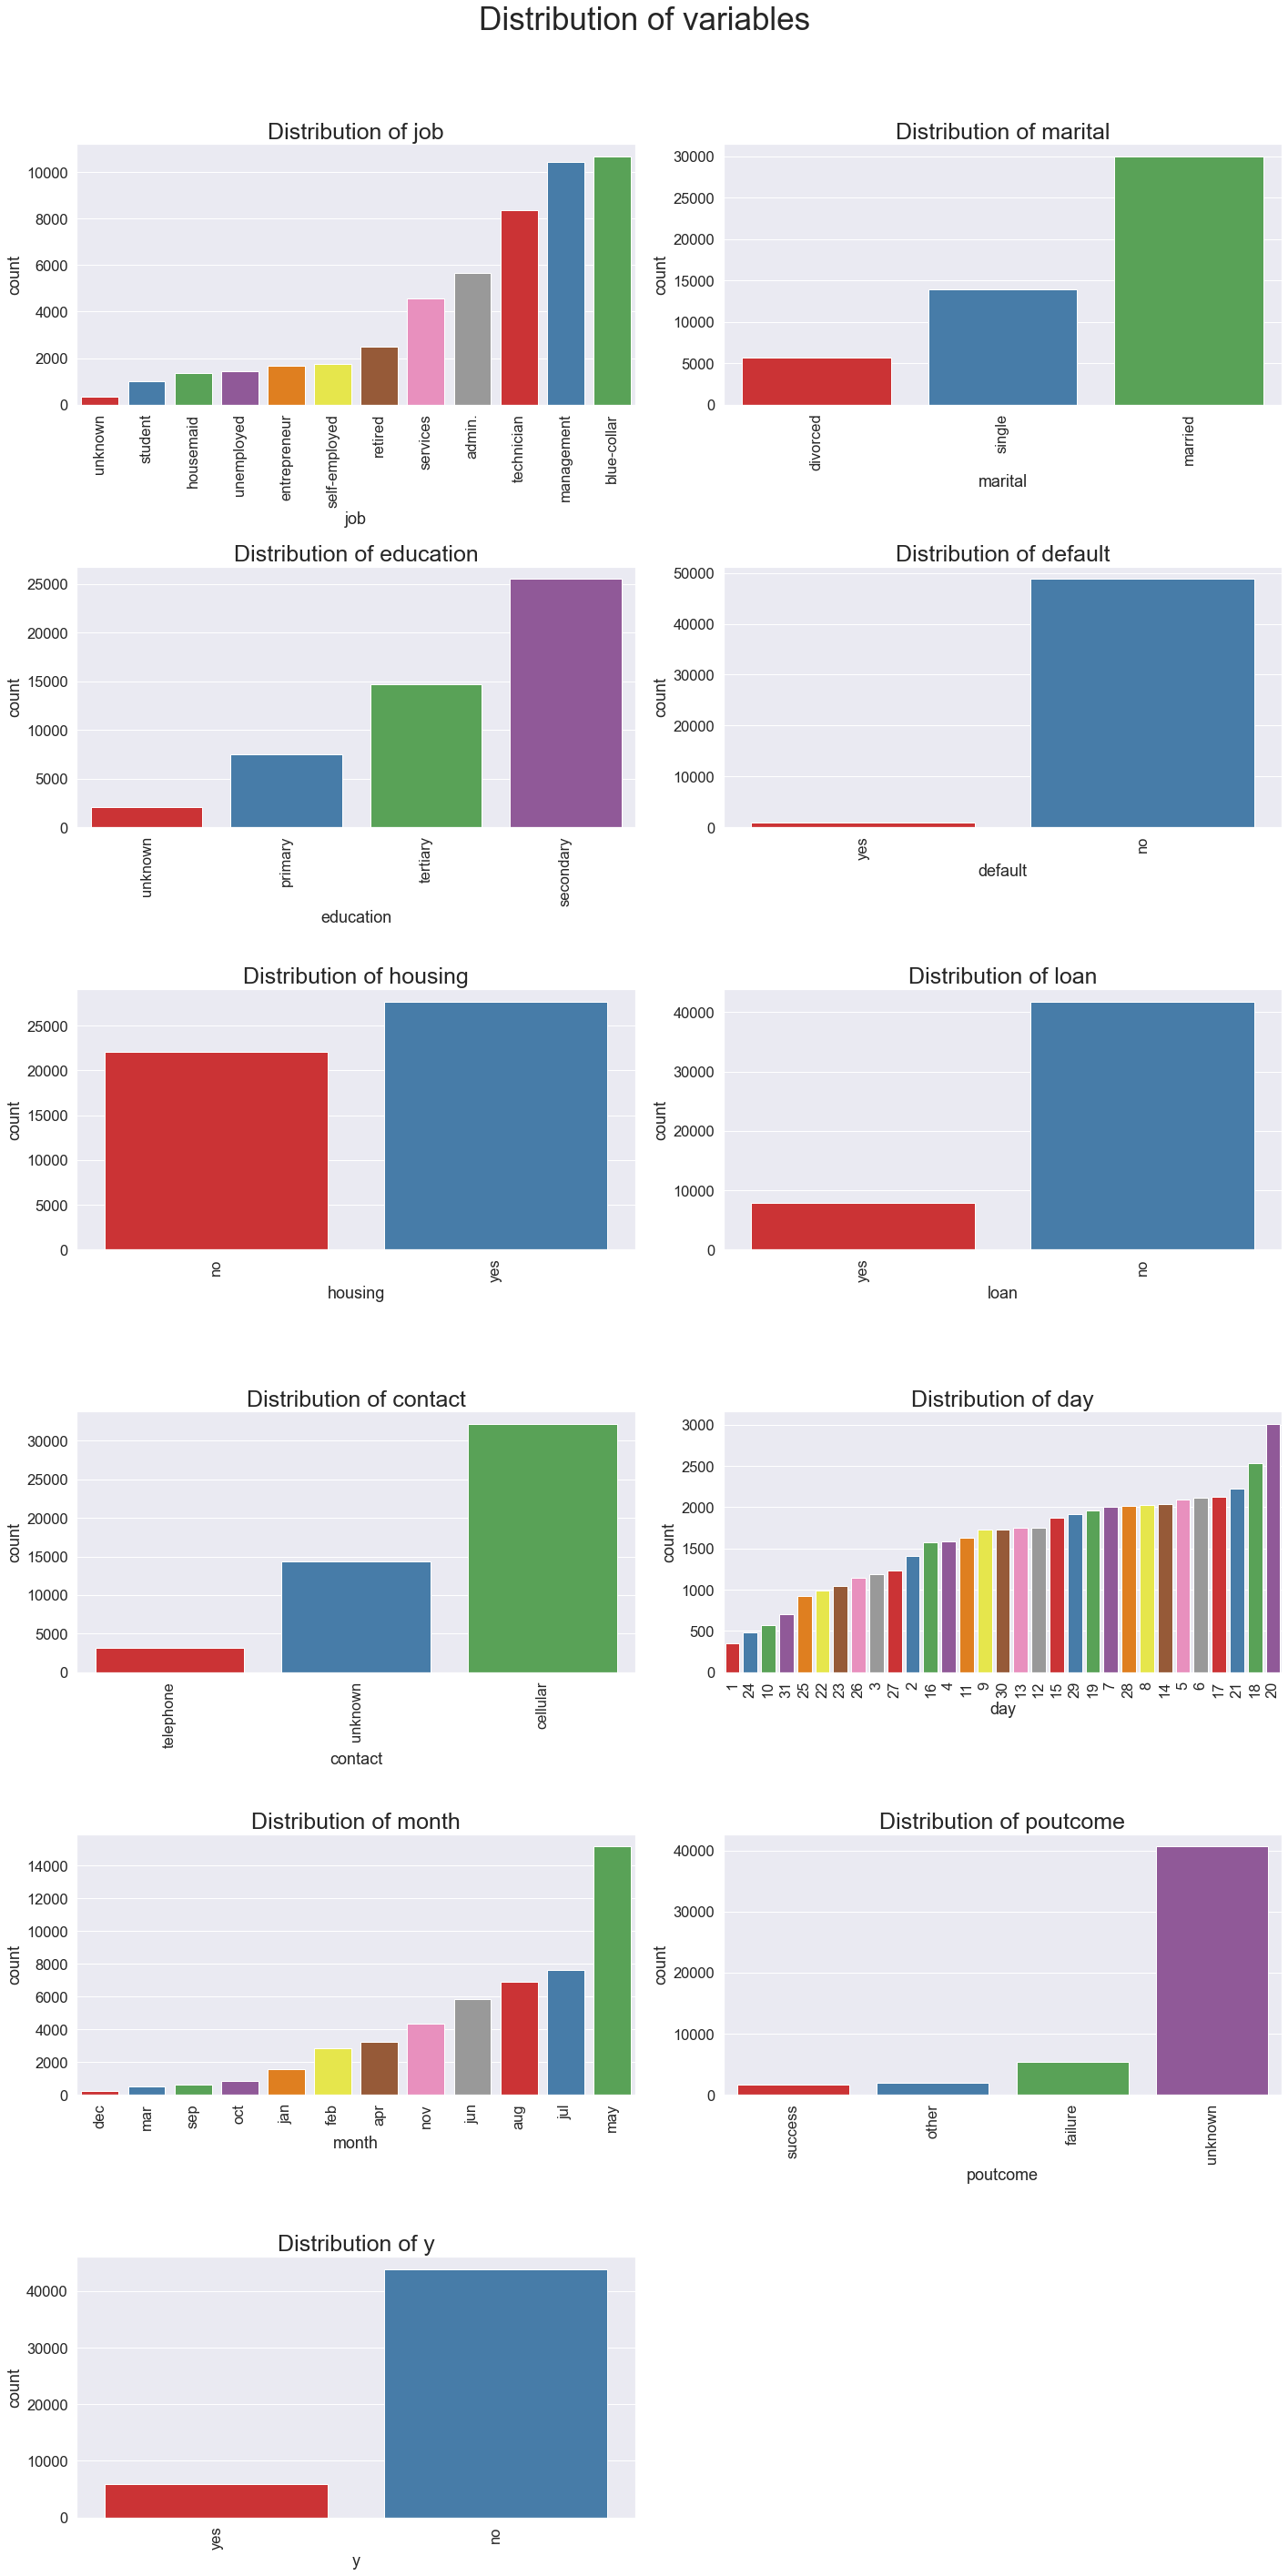

In [27]:
n=1
plt.subplots(figsize=(20, 50))
for i in category:
    plt.subplot(8,2,n)
    ax = plt.gca()
    sns.set(font_scale = 1.5)
    sns.countplot(x = bank1[i], palette='Set1',order=bank1[i].value_counts().sort_values().index)    
    ax.set_title('Distribution of %s'%(i), fontsize=25)
    plt.xticks(rotation=90)
    n+=1 
    plt.tight_layout()
plt.suptitle('Distribution of variables', y=1.03, fontsize=35)
plt.show()


## Numerical vs categorical 

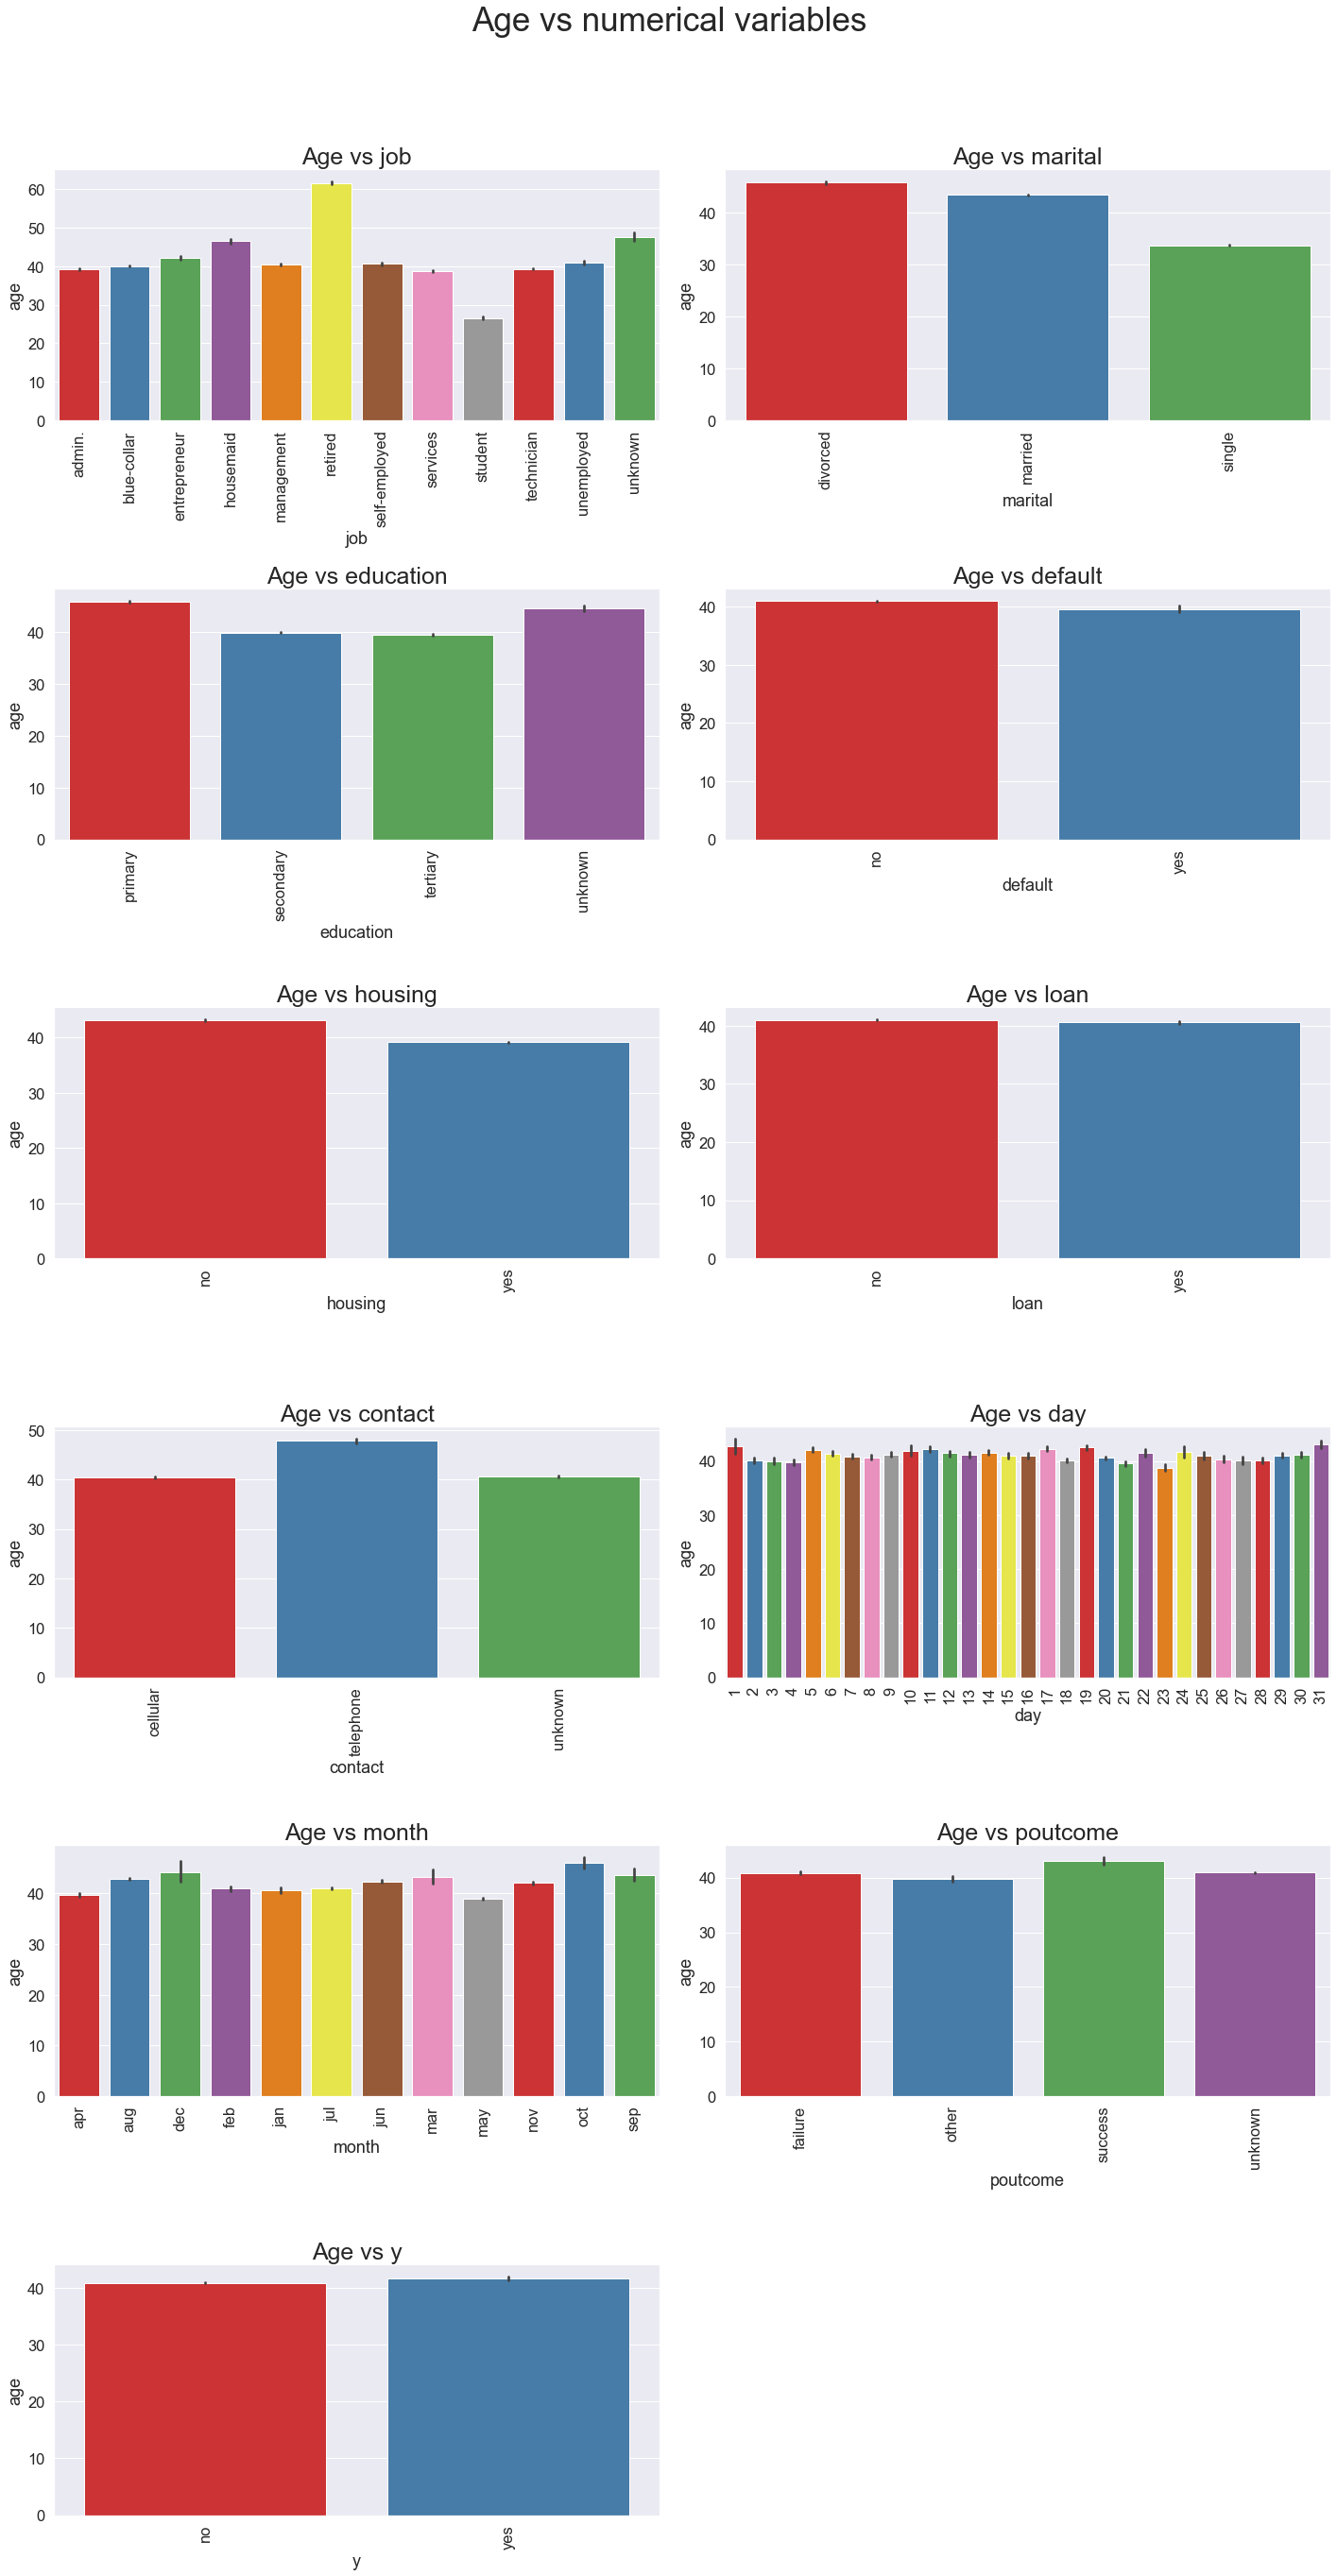

In [28]:
n=1
plt.subplots(figsize=(20, 60))
for i in category:
    plt.subplot(10,2,n)
    ax = plt.gca()
    sns.set(font_scale = 1.5)
    sns.barplot(x =bank1[i], y=bank1['age'], palette='Set1')    
    ax.set_title('Age vs %s'%(i), fontsize=25)
    plt.xticks(rotation=90)
    n+=1 
    
    plt.tight_layout()
plt.suptitle('Age vs numerical variables', y=1.03, fontsize=35)
plt.show()


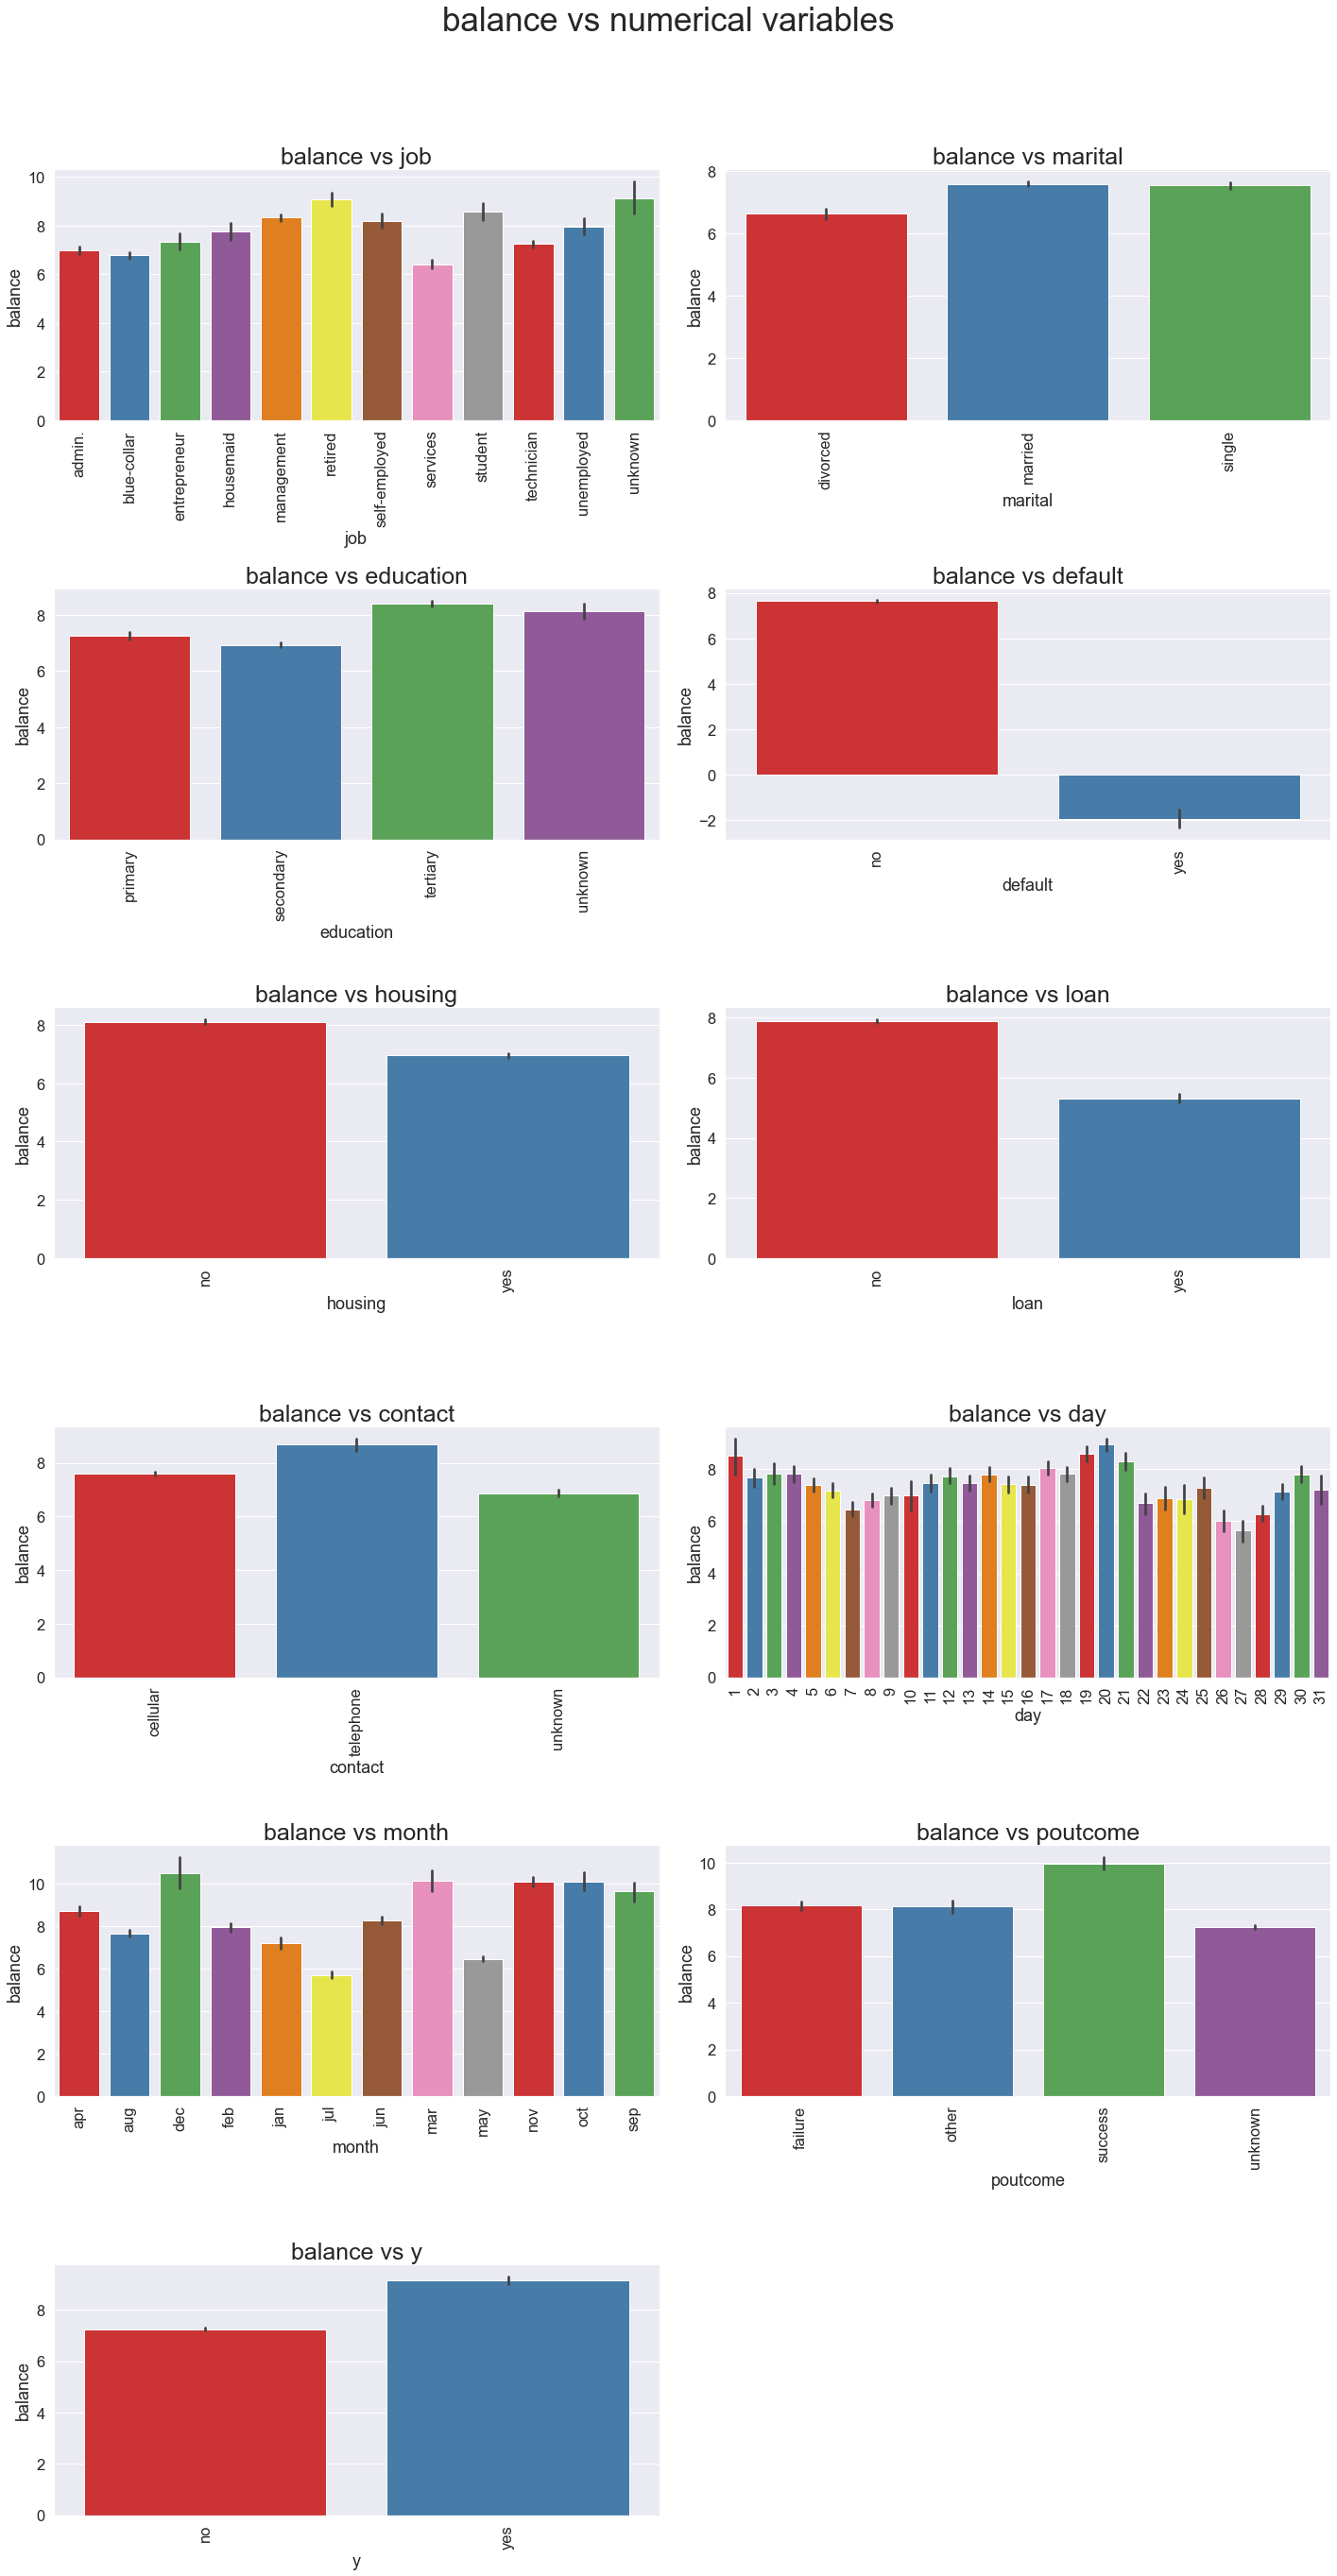

In [29]:
n=1
plt.subplots(figsize=(20, 60))
for i in category:
    plt.subplot(10,2,n)
    ax = plt.gca()
    sns.set(font_scale = 1.5)
    sns.barplot(x =bank1[i], y=bank1['balance'], palette='Set1')    
    ax.set_title('balance vs %s'%(i), fontsize=25)
    plt.xticks(rotation=90)
    n+=1 
    
    plt.tight_layout()
plt.suptitle('balance vs numerical variables', y=1.03, fontsize=35)
plt.show()


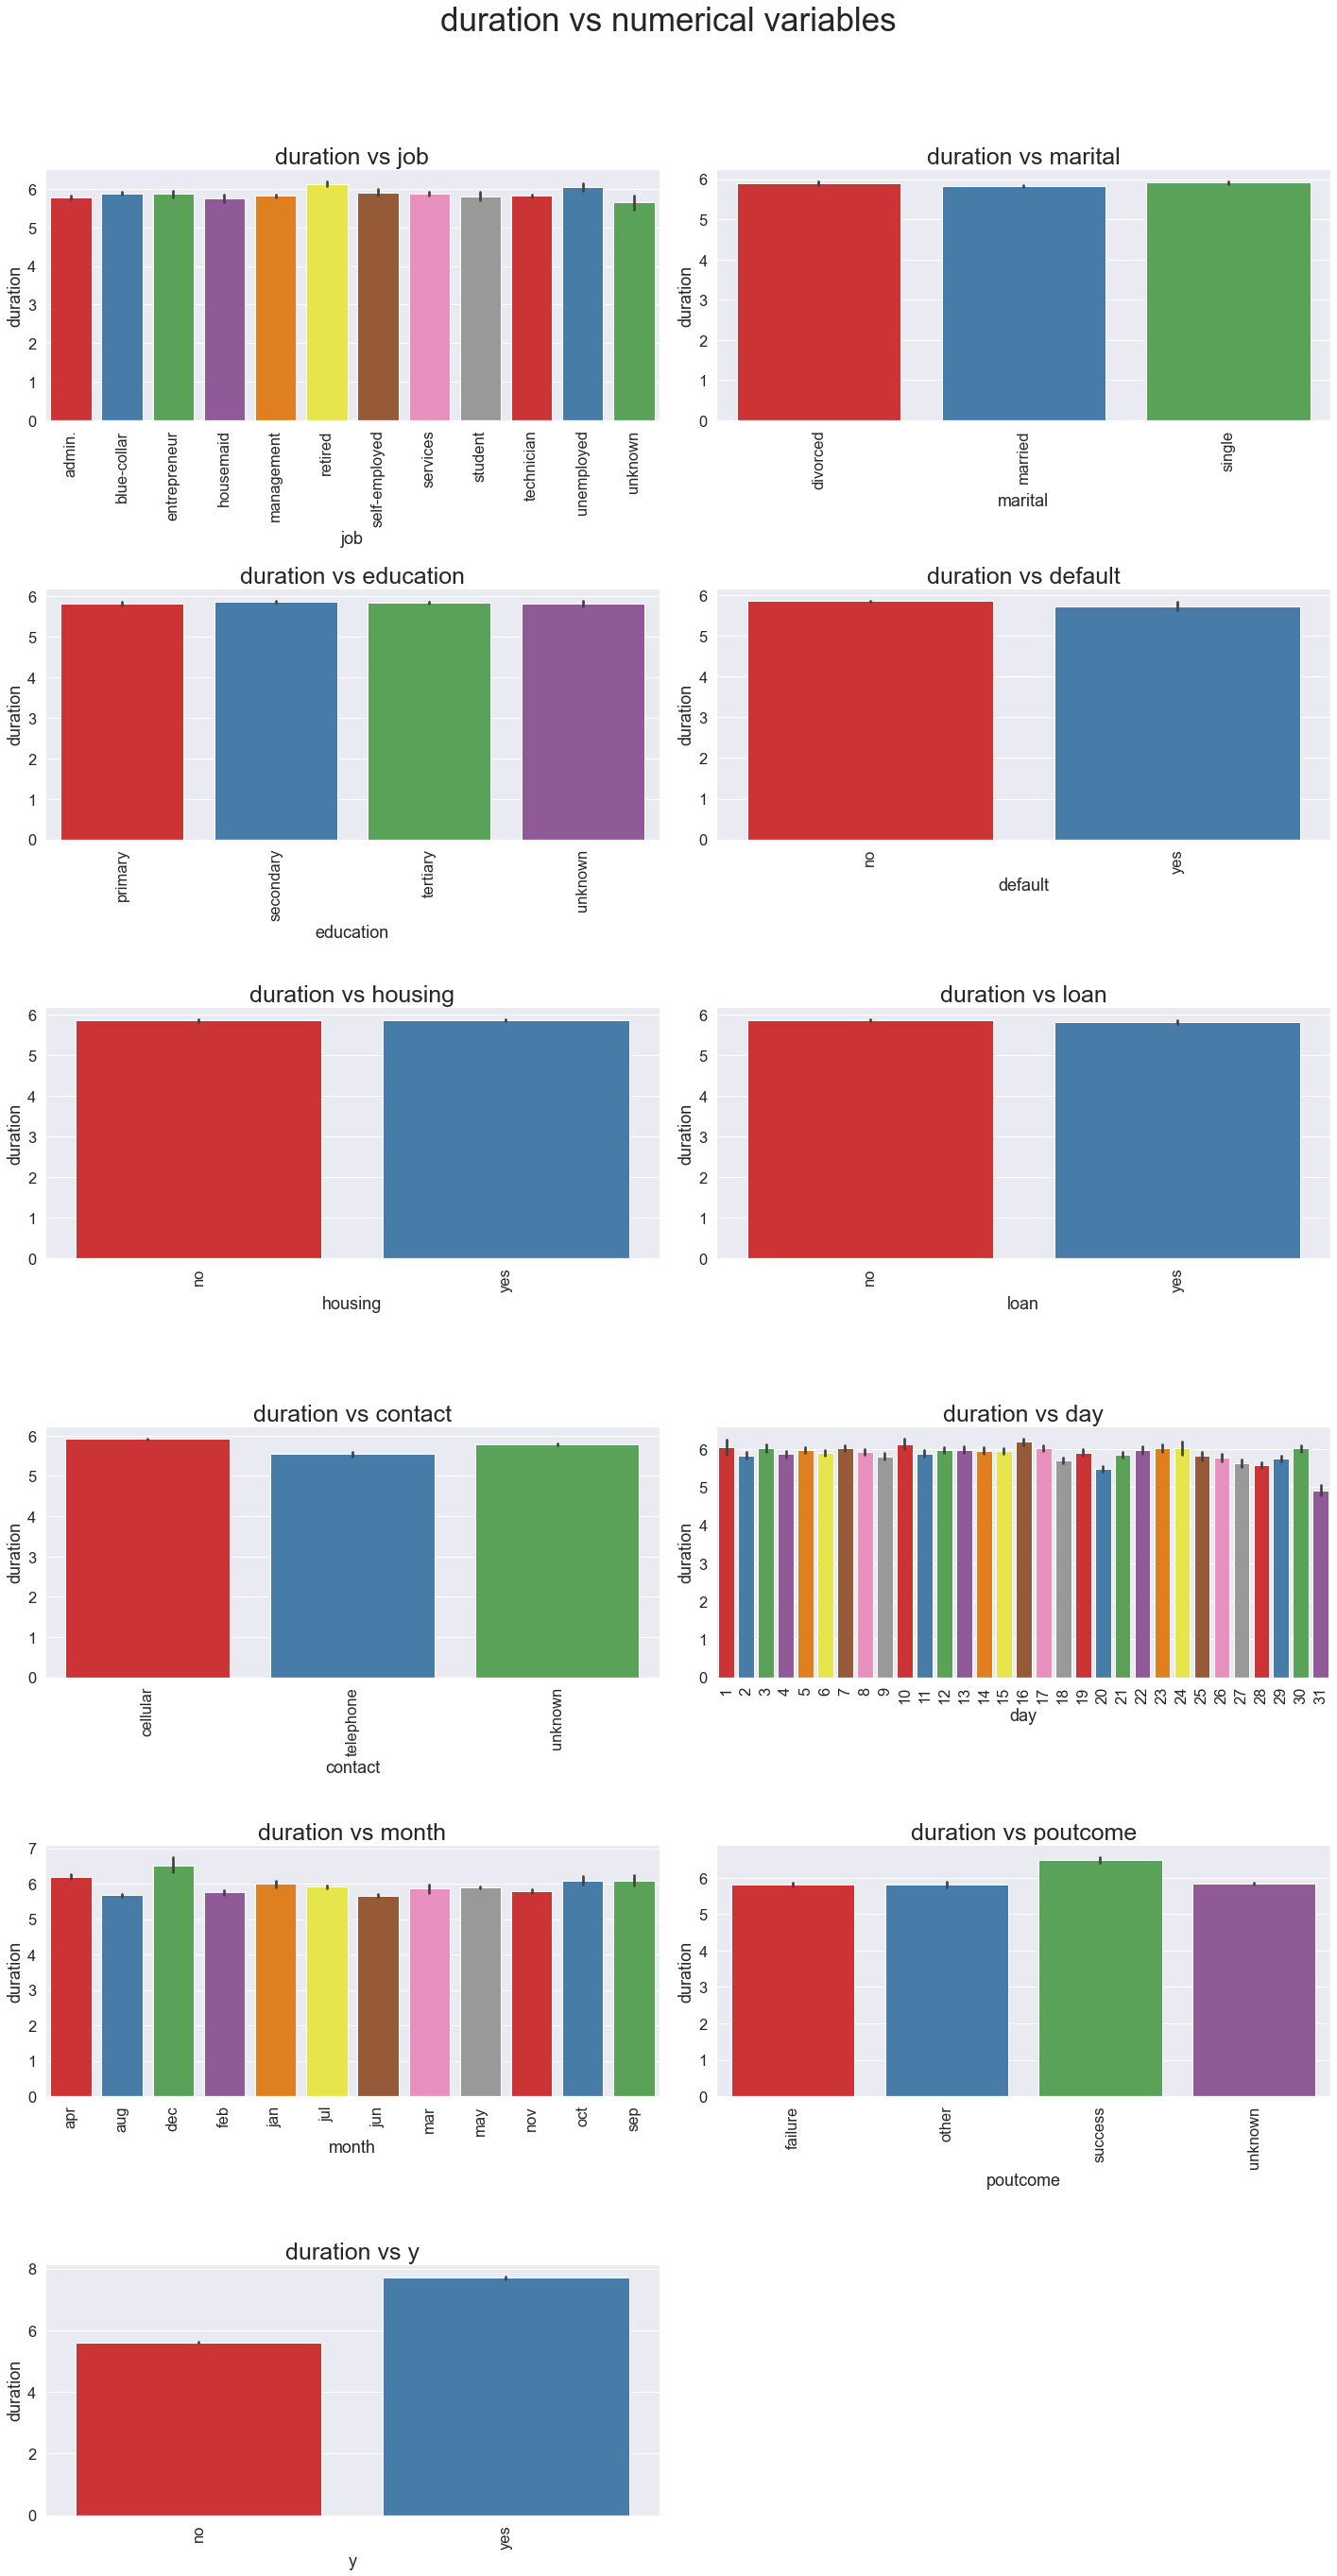

In [30]:
n=1
plt.subplots(figsize=(20, 60))
for i in category:
    plt.subplot(10,2,n)
    ax = plt.gca()
    sns.set(font_scale = 1.5)
    sns.barplot(x =bank1[i], y=bank1['duration'], palette='Set1')    
    ax.set_title('duration vs %s'%(i), fontsize=25)
    plt.xticks(rotation=90)
    n+=1 
    
    plt.tight_layout()
plt.suptitle('duration vs numerical variables', y=1.03, fontsize=35)
plt.show()


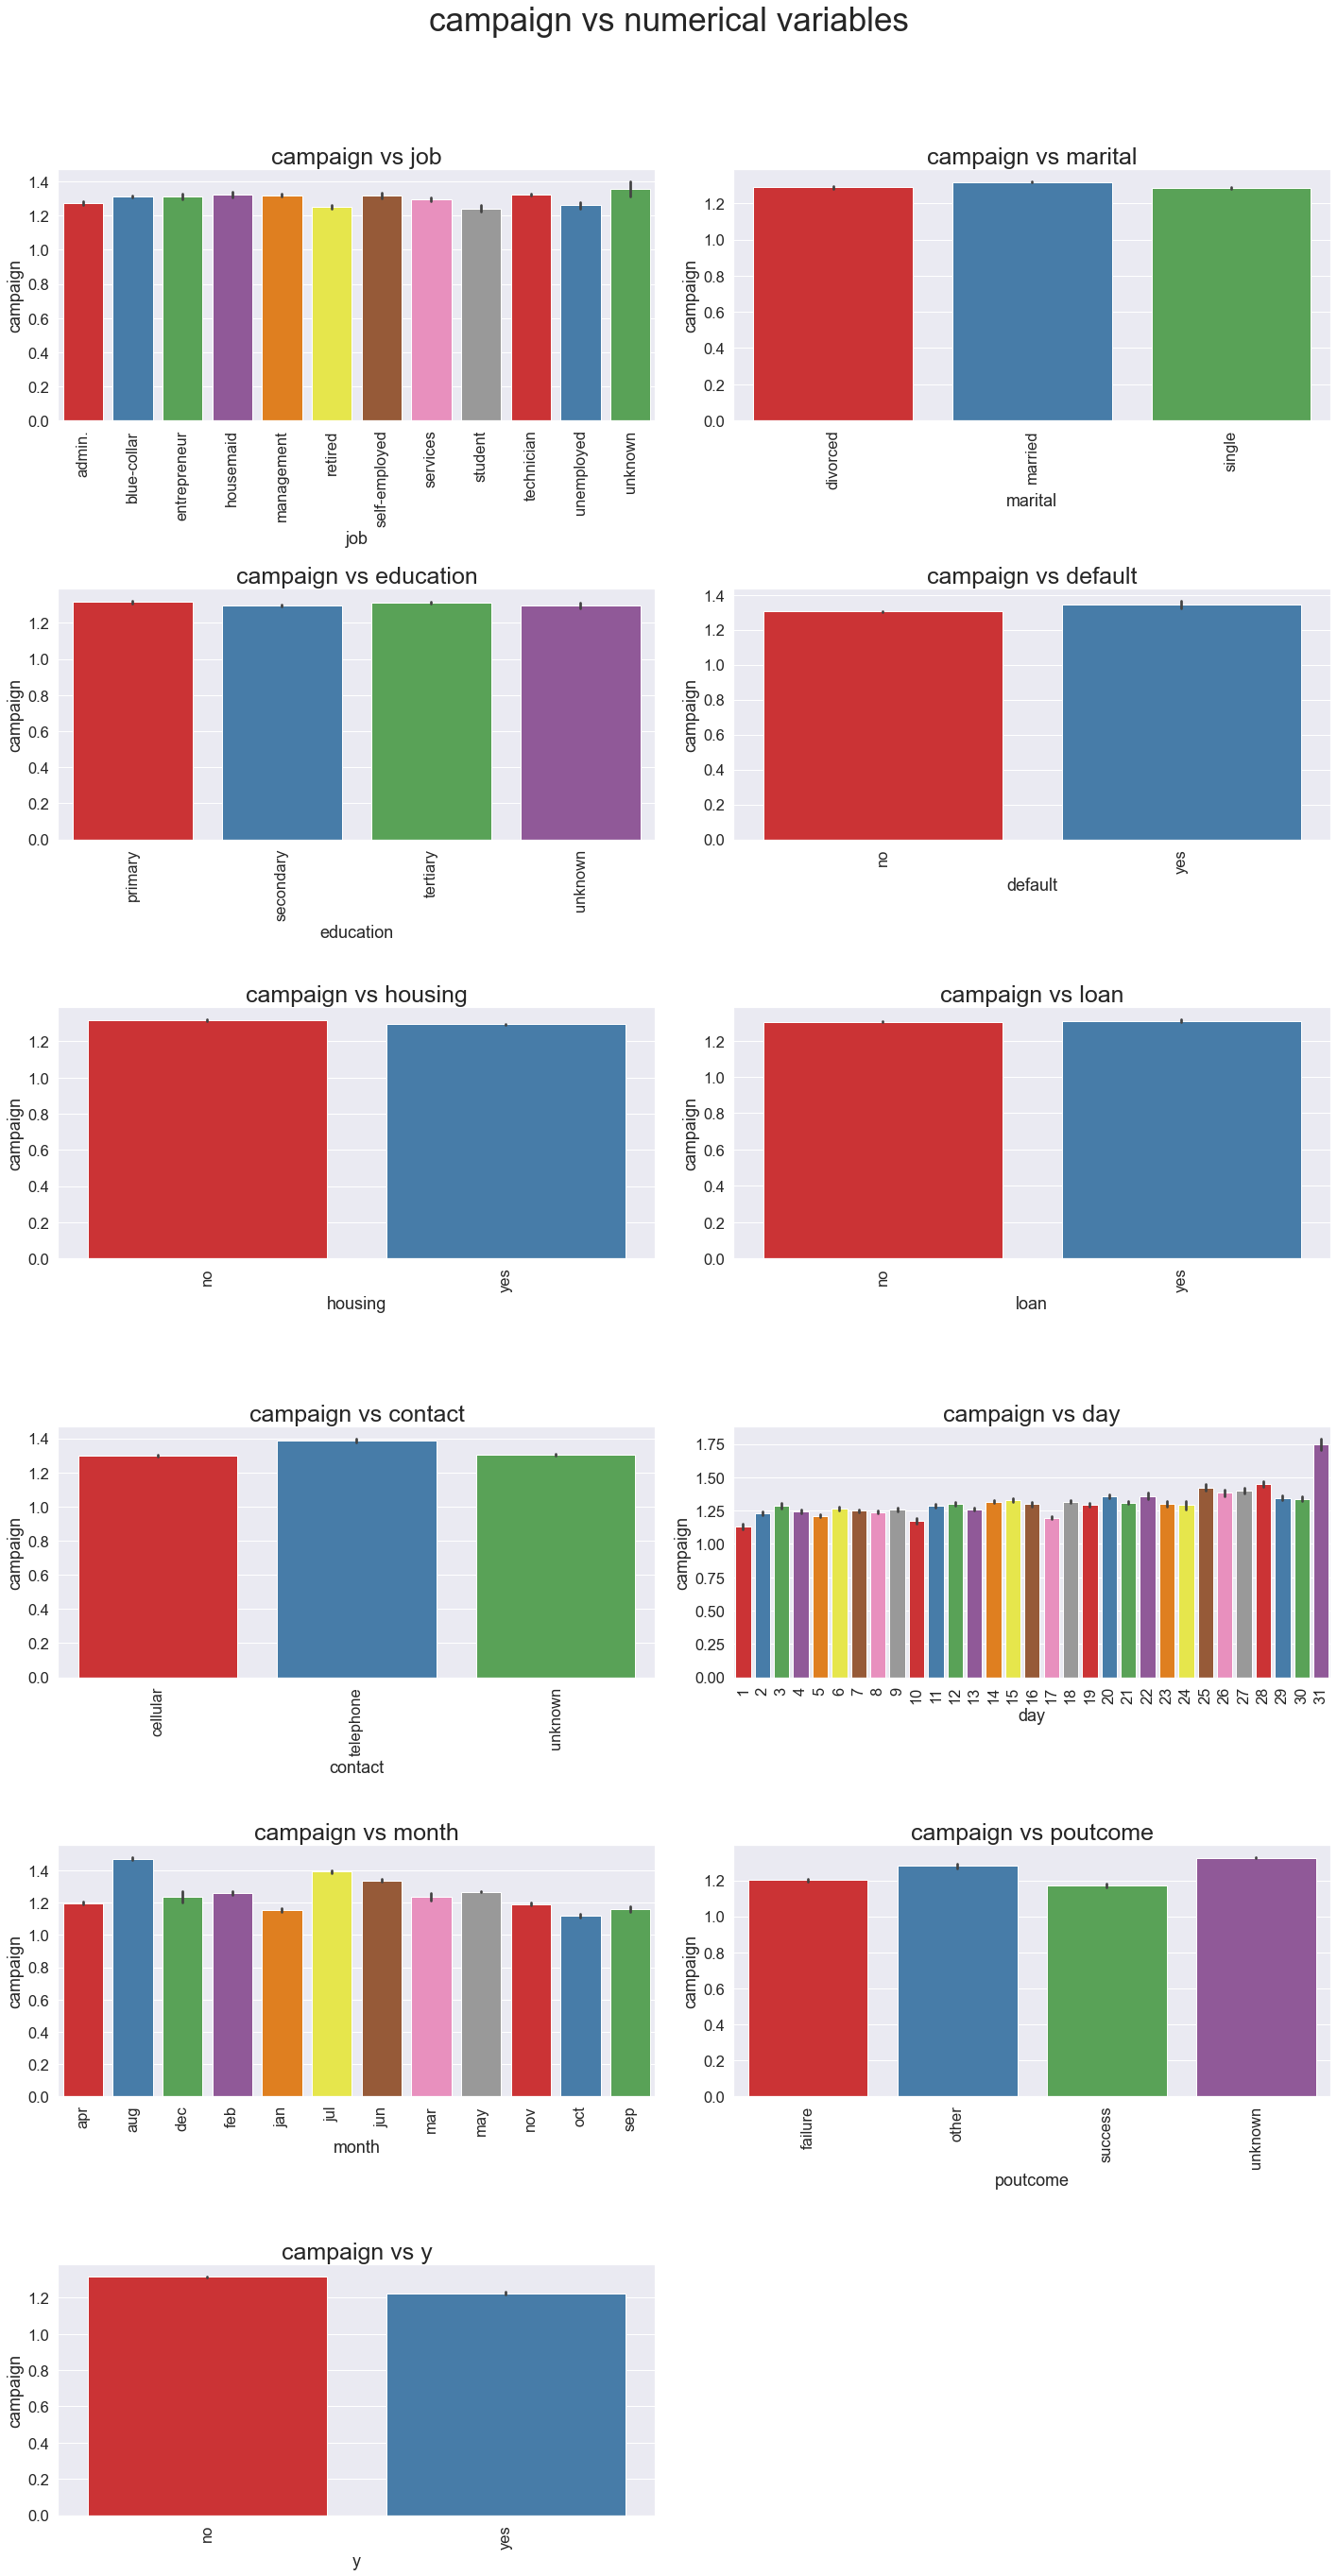

In [31]:
n=1
plt.subplots(figsize=(20, 60))
for i in category:
    plt.subplot(10,2,n)
    ax = plt.gca()
    sns.set(font_scale = 1.5)
    sns.barplot(x =bank1[i], y=bank1['campaign'], palette='Set1')    
    ax.set_title('campaign vs %s'%(i), fontsize=25)
    plt.xticks(rotation=90)
    n+=1 
    
    plt.tight_layout()
plt.suptitle('campaign vs numerical variables', y=1.03, fontsize=35)
plt.show()


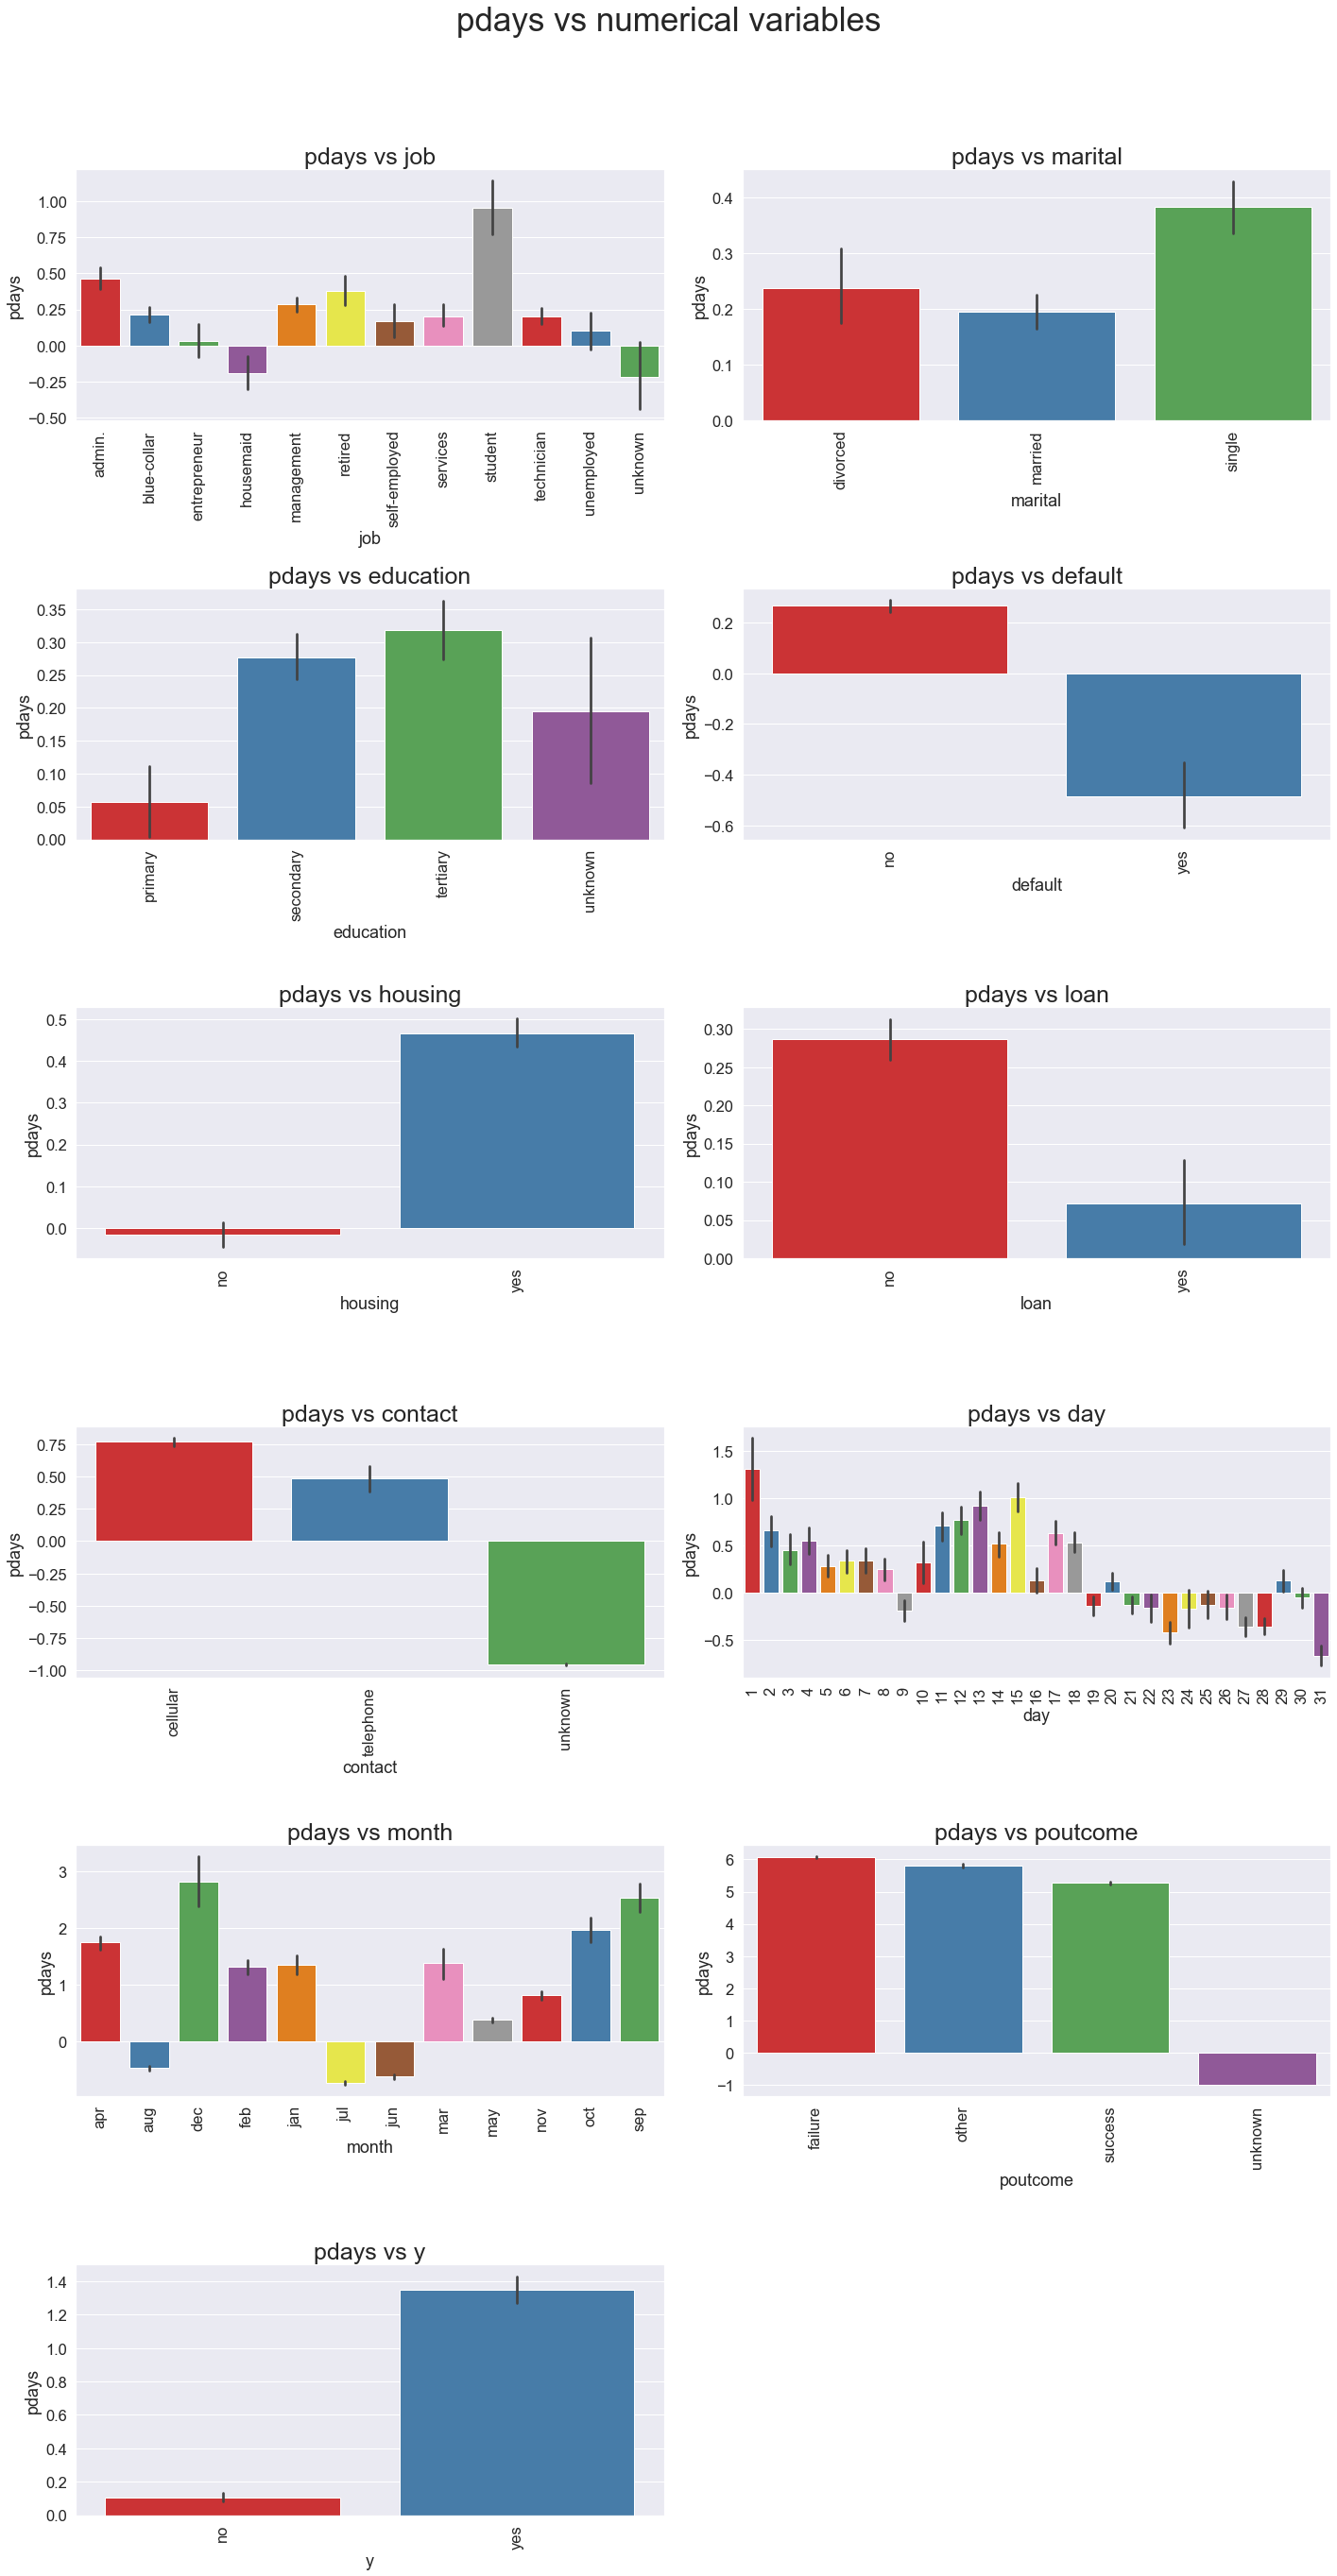

In [32]:
n=1
plt.subplots(figsize=(20, 60))
for i in category:
    plt.subplot(10,2,n)
    ax = plt.gca()
    sns.set(font_scale = 1.5)
    sns.barplot(x =bank1[i], y=bank1['pdays'], palette='Set1')    
    ax.set_title('pdays vs %s'%(i), fontsize=25)
    plt.xticks(rotation=90)
    n+=1 
    
    plt.tight_layout()
plt.suptitle('pdays vs numerical variables', y=1.03, fontsize=35)
plt.show()


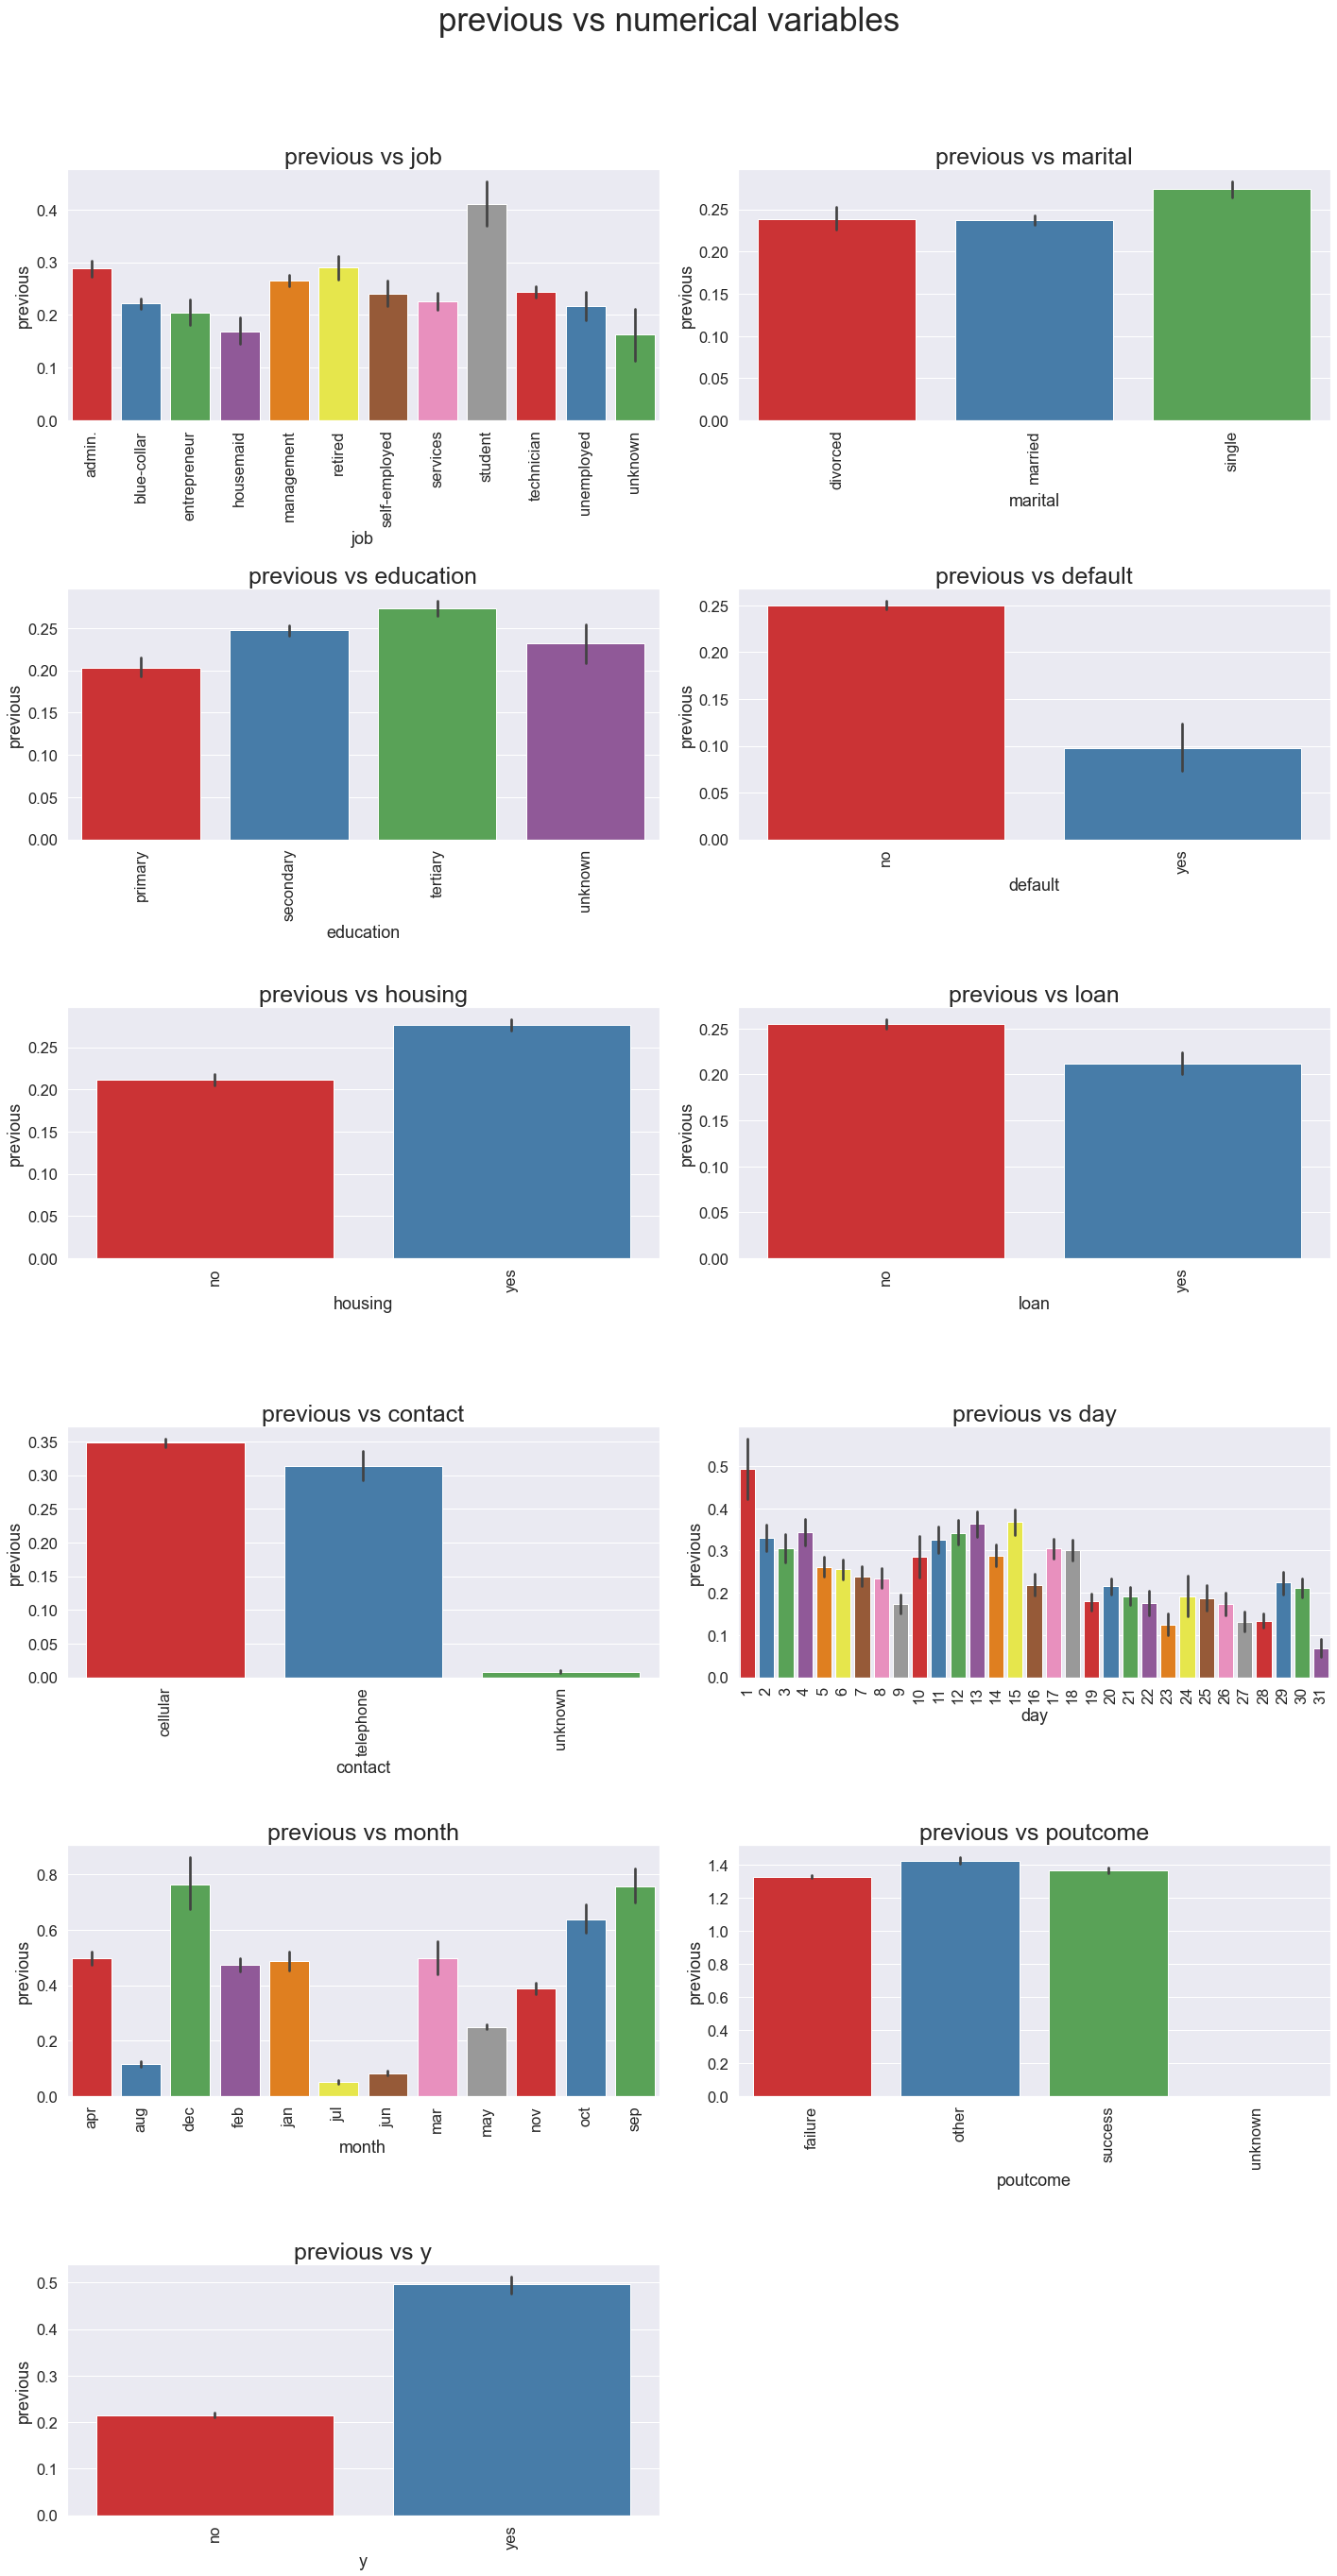

In [33]:
n=1
plt.subplots(figsize=(20, 60))
for i in category:
    plt.subplot(10,2,n)
    ax = plt.gca()
    sns.set(font_scale = 1.5)
    sns.barplot(x =bank1[i], y=bank1['previous'], palette='Set1')    
    ax.set_title('previous vs %s'%(i), fontsize=25)
    plt.xticks(rotation=90)
    n+=1 
    
    plt.tight_layout()
plt.suptitle('previous vs numerical variables', y=1.03, fontsize=35)
plt.show()


In [34]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        49732 non-null  int64   
 1   job        49732 non-null  category
 2   marital    49732 non-null  category
 3   education  49732 non-null  category
 4   default    49732 non-null  category
 5   balance    49732 non-null  float64 
 6   housing    49732 non-null  category
 7   loan       49732 non-null  category
 8   contact    49732 non-null  category
 9   day        49732 non-null  category
 10  month      49732 non-null  category
 11  duration   49732 non-null  float64 
 12  campaign   49732 non-null  float64 
 13  pdays      49732 non-null  float64 
 14  previous   49732 non-null  float64 
 15  poutcome   49732 non-null  category
 16  y          49732 non-null  category
dtypes: category(11), float64(5), int64(1)
memory usage: 2.8 MB


In [35]:
bank1["smplAge"] = bank1.age.copy()
bank1.loc[bank1["age"] < 30, "smplAge"] = 1
bank1.loc[(bank1["age"] >= 30) & (bank1["age"] < 40), "smplAge"] = 2
bank1.loc[(bank1["age"] >= 40) & (bank1["age"] < 50), "smplAge"] = 3
bank1.loc[(bank1["age"] >= 50) & (bank1["age"] < 60), "smplAge"] = 4
bank1.loc[bank1["age"] >= 60, "smplAge"] = 5

In [36]:
people_type = ['smplAge', 'job', 'marital', 'education']

In [37]:
for people in people_type:
    globals()[f"count_{people}"] = bank1.groupby(by=[people, "y"]).size().reset_index(name="counts")

In [38]:
yes_smplAge = count_smplAge.loc[count_smplAge['y'] == 'yes']
max_smplAge_counts = yes_smplAge['counts'].max()

yes_job = count_job.loc[count_job['y'] == 'yes']
max_job_counts = yes_job['counts'].max()

yes_merital = count_marital.loc[count_marital['y'] == 'yes']
max_merital_counts = yes_merital['counts'].max()

yes_education = count_education.loc[count_education['y'] == 'yes']
max_education_counts = yes_education['counts'].max()

In [39]:
yes_smplAge.sort_values(by=['counts'],ascending=False)

,smplAge,y,counts
3,2,yes,2098
5,3,yes,1186
1,1,yes,1002
7,4,yes,869
9,5,yes,655


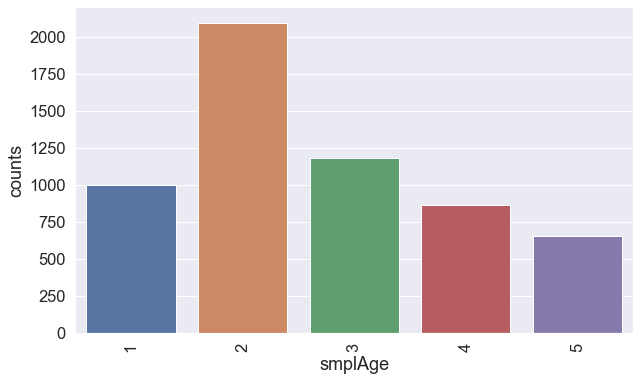

In [40]:
sns.barplot(x=yes_smplAge['smplAge'], y=yes_smplAge['counts'])
plt.xticks(rotation=90)
plt.show()

In [41]:
yes_job.sort_values(by=['counts'],ascending=False)

,job,y,counts
9,management,yes,1432
19,technician,yes,923
3,blue-collar,yes,777
1,admin.,yes,689
11,retired,yes,570
15,services,yes,407
17,student,yes,288
21,unemployed,yes,215
13,self-employed,yes,207
5,entrepreneur,yes,138


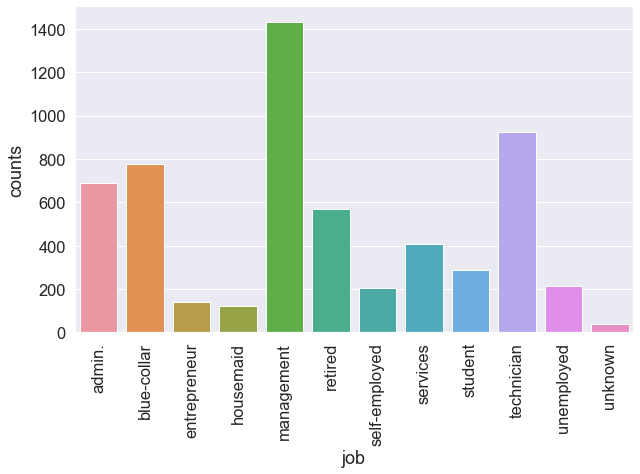

In [42]:
sns.barplot(x=yes_job['job'], y=yes_job['counts'])
plt.xticks(rotation=90)
plt.show()

In [43]:
yes_merital.sort_values(by=['counts'],ascending=False)

,marital,y,counts
3,married,yes,3032
5,single,yes,2079
1,divorced,yes,699


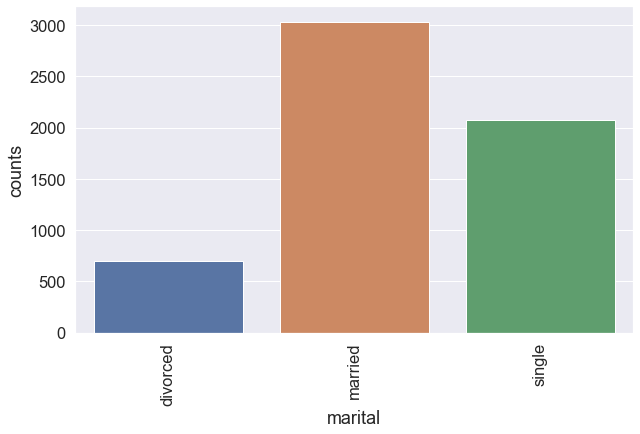

In [44]:
sns.barplot(x=yes_merital['marital'], y=yes_merital['counts'])
plt.xticks(rotation=90)
plt.show()

In [45]:
yes_education.sort_values(by=['counts'],ascending=False)

,education,y,counts
3,secondary,yes,2695
5,tertiary,yes,2189
1,primary,yes,655
7,unknown,yes,271


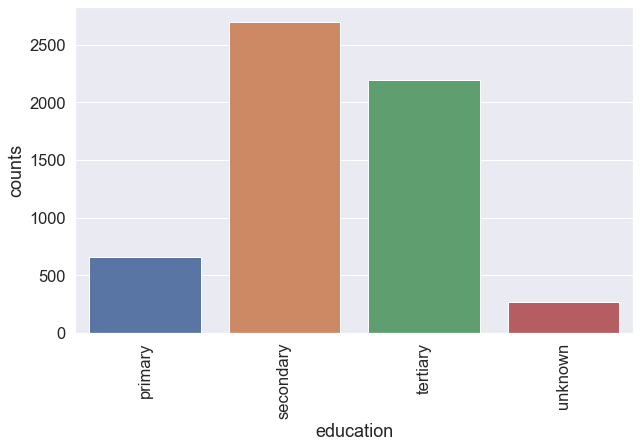

In [46]:
sns.barplot(x=yes_education['education'], y=yes_education['counts'])
plt.xticks(rotation=90)
plt.show()

In [68]:
bank_yes =bank1.loc[(bank1['marital'] == 'married') & (bank1['y'] == 'yes')]
bank_yes

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,smplAge
83,59,admin.,married,secondary,no,13.281815,yes,no,unknown,5,may,10.138084,1.000000,-1.000000,0.0,unknown,yes,4
86,56,admin.,married,secondary,no,3.556893,no,no,unknown,5,may,11.362573,1.000000,-1.000000,0.0,unknown,yes,4
87,41,technician,married,secondary,no,10.829321,yes,no,unknown,5,may,11.157513,1.000000,-1.000000,0.0,unknown,yes,3
129,55,services,married,secondary,no,13.528518,yes,no,unknown,5,may,8.334755,1.000000,-1.000000,0.0,unknown,yes,4
168,54,admin.,married,tertiary,no,5.687734,no,no,unknown,5,may,8.763381,1.259921,-1.000000,0.0,unknown,yes,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49613,41,entrepreneur,married,primary,no,3.391211,yes,no,cellular,21,nov,8.188244,1.259921,-1.000000,0.0,unknown,yes,3
49644,40,management,married,tertiary,no,-2.571282,yes,yes,cellular,11,may,7.796975,1.000000,6.349604,1.0,success,yes,3
49695,38,management,married,tertiary,no,15.089831,no,no,cellular,21,nov,8.719760,1.587401,-1.000000,0.0,unknown,yes,2
49714,60,self-employed,married,primary,no,7.126936,no,yes,cellular,29,jul,9.344657,1.817121,-1.000000,0.0,unknown,yes,5


In [69]:
bank_yes.loc[(bank1['housing'] == 'no') | (bank1['loan'] == 'no')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,smplAge
83,59,admin.,married,secondary,no,13.281815,yes,no,unknown,5,may,10.138084,1.000000,-1.0,0.0,unknown,yes,4
86,56,admin.,married,secondary,no,3.556893,no,no,unknown,5,may,11.362573,1.000000,-1.0,0.0,unknown,yes,4
87,41,technician,married,secondary,no,10.829321,yes,no,unknown,5,may,11.157513,1.000000,-1.0,0.0,unknown,yes,3
129,55,services,married,secondary,no,13.528518,yes,no,unknown,5,may,8.334755,1.000000,-1.0,0.0,unknown,yes,4
168,54,admin.,married,tertiary,no,5.687734,no,no,unknown,5,may,8.763381,1.259921,-1.0,0.0,unknown,yes,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49603,50,unemployed,married,secondary,no,14.973286,no,no,cellular,9,jun,6.205822,1.587401,-1.0,0.0,unknown,yes,4
49613,41,entrepreneur,married,primary,no,3.391211,yes,no,cellular,21,nov,8.188244,1.259921,-1.0,0.0,unknown,yes,3
49695,38,management,married,tertiary,no,15.089831,no,no,cellular,21,nov,8.719760,1.587401,-1.0,0.0,unknown,yes,2
49714,60,self-employed,married,primary,no,7.126936,no,yes,cellular,29,jul,9.344657,1.817121,-1.0,0.0,unknown,yes,5


In [49]:
no_smplAge = count_smplAge.loc[count_smplAge['y'] == 'no']
no_max_smplAge_counts = no_smplAge['counts'].max()

no_job = count_job.loc[count_job['y'] == 'no']
no_max_job_counts = no_job['counts'].max()

no_merital = count_marital.loc[count_marital['y'] == 'no']
no_max_merital_counts = no_merital['counts'].max()

no_education = count_education.loc[count_education['y'] == 'no']
no_max_education_counts = no_education['counts'].max()

In [50]:
no_smplAge.sort_values(by=['counts'],ascending=False)

,smplAge,y,counts
2,2,no,17799
4,3,no,11672
6,4,no,8395
0,1,no,4753
8,5,no,1303


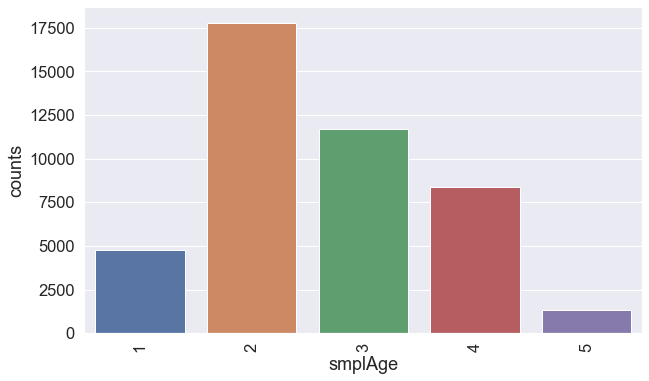

In [51]:
sns.barplot(x=no_smplAge['smplAge'], y=no_smplAge['counts'])
plt.xticks(rotation=90)
plt.show()

In [52]:
no_job.sort_values(by=['counts'],ascending=False)

,job,y,counts
2,blue-collar,no,9901
8,management,no,8995
18,technician,no,7442
0,admin.,no,4960
14,services,no,4164
10,retired,no,1924
12,self-employed,no,1555
4,entrepreneur,no,1517
6,housemaid,no,1229
20,unemployed,no,1216


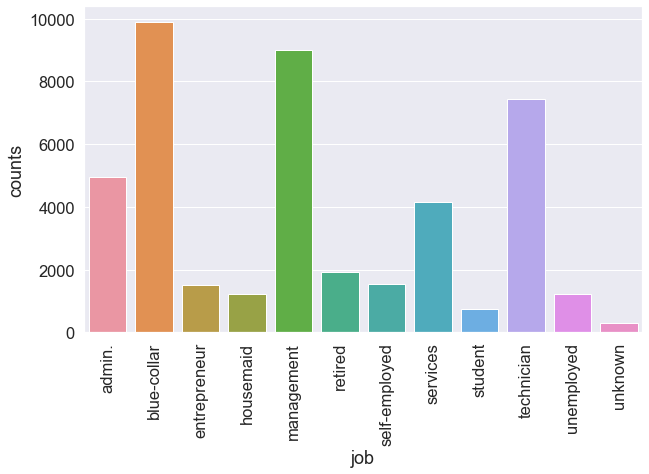

In [53]:
sns.barplot(x=no_job['job'], y=no_job['counts'])
plt.xticks(rotation=90)
plt.show()

In [54]:
no_merital.sort_values(by=['counts'],ascending=False)

,marital,y,counts
2,married,no,26979
4,single,no,11907
0,divorced,no,5036


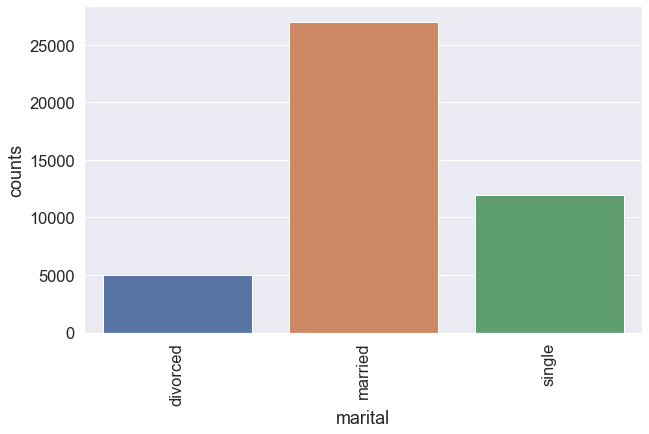

In [55]:
sns.barplot(x=no_merital['marital'], y=no_merital['counts'])
plt.xticks(rotation=90)
plt.show()

In [56]:
no_education.sort_values(by=['counts'],ascending=False)

,education,y,counts
2,secondary,no,22813
4,tertiary,no,12462
0,primary,no,6874
6,unknown,no,1773


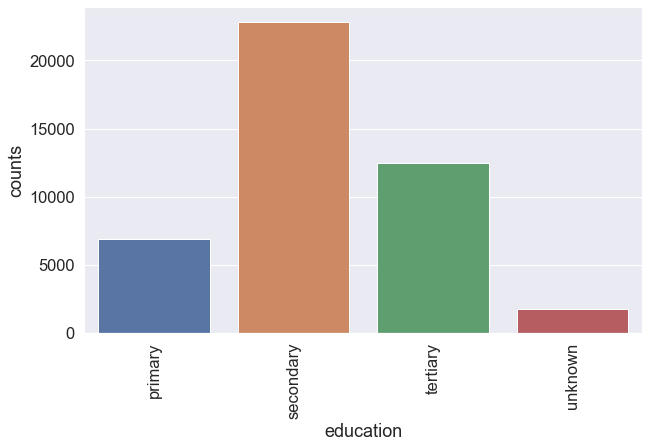

In [57]:
sns.barplot(x=no_education['education'], y=no_education['counts'])
plt.xticks(rotation=90)
plt.show()

In [58]:
bank_no = bank1.loc[(bank1['marital'] == 'married') & (bank1['y'] == 'no')]
bank_no

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,smplAge
0,58,management,married,tertiary,no,12.892606,yes,no,unknown,5,may,6.390677,1.000000,-1.000000,0.00000,unknown,no,4
2,33,entrepreneur,married,secondary,no,1.259921,yes,yes,unknown,5,may,4.235824,1.000000,-1.000000,0.00000,unknown,no,2
3,47,blue-collar,married,unknown,no,11.462385,yes,no,unknown,5,may,4.514357,1.000000,-1.000000,0.00000,unknown,no,3
5,35,management,married,tertiary,no,6.135792,yes,no,unknown,5,may,5.180101,1.000000,-1.000000,0.00000,unknown,no,2
8,58,retired,married,primary,no,4.946087,yes,no,unknown,5,may,3.684031,1.000000,-1.000000,0.00000,unknown,no,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49725,38,blue-collar,married,secondary,no,10.641324,yes,no,cellular,20,apr,3.556893,1.587401,5.348481,1.00000,failure,no,2
49727,33,services,married,secondary,no,-6.931301,yes,no,cellular,30,jul,6.903436,1.709976,-1.000000,0.00000,unknown,no,2
49728,57,self-employed,married,tertiary,yes,-14.907580,yes,yes,unknown,9,may,5.348481,1.000000,-1.000000,0.00000,unknown,no,4
49729,57,technician,married,secondary,no,6.656930,no,no,cellular,19,aug,5.325074,2.223980,-1.000000,0.00000,unknown,no,4


In [59]:
bank_no.loc[(bank1['housing'] == 'yes') | (bank1['loan'] == 'yes')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,smplAge
0,58,management,married,tertiary,no,12.892606,yes,no,unknown,5,may,6.390677,1.000000,-1.000000,0.0,unknown,no,4
2,33,entrepreneur,married,secondary,no,1.259921,yes,yes,unknown,5,may,4.235824,1.000000,-1.000000,0.0,unknown,no,2
3,47,blue-collar,married,unknown,no,11.462385,yes,no,unknown,5,may,4.514357,1.000000,-1.000000,0.0,unknown,no,3
5,35,management,married,tertiary,no,6.135792,yes,no,unknown,5,may,5.180101,1.000000,-1.000000,0.0,unknown,no,2
8,58,retired,married,primary,no,4.946087,yes,no,unknown,5,may,3.684031,1.000000,-1.000000,0.0,unknown,no,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49719,42,admin.,married,unknown,no,8.626706,yes,yes,unknown,16,may,7.984344,1.259921,-1.000000,0.0,unknown,no,3
49723,40,blue-collar,married,secondary,no,10.322801,yes,no,unknown,29,may,8.706588,1.259921,-1.000000,0.0,unknown,no,3
49725,38,blue-collar,married,secondary,no,10.641324,yes,no,cellular,20,apr,3.556893,1.587401,5.348481,1.0,failure,no,2
49727,33,services,married,secondary,no,-6.931301,yes,no,cellular,30,jul,6.903436,1.709976,-1.000000,0.0,unknown,no,2


In [63]:
bank_no.loc[(bank1['previous'] == 0.0) ]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,smplAge
0,58,management,married,tertiary,no,12.892606,yes,no,unknown,5,may,6.390677,1.000000,-1.0,0.0,unknown,no,4
2,33,entrepreneur,married,secondary,no,1.259921,yes,yes,unknown,5,may,4.235824,1.000000,-1.0,0.0,unknown,no,2
3,47,blue-collar,married,unknown,no,11.462385,yes,no,unknown,5,may,4.514357,1.000000,-1.0,0.0,unknown,no,3
5,35,management,married,tertiary,no,6.135792,yes,no,unknown,5,may,5.180101,1.000000,-1.0,0.0,unknown,no,2
8,58,retired,married,primary,no,4.946087,yes,no,unknown,5,may,3.684031,1.000000,-1.0,0.0,unknown,no,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49723,40,blue-collar,married,secondary,no,10.322801,yes,no,unknown,29,may,8.706588,1.259921,-1.0,0.0,unknown,no,3
49724,49,blue-collar,married,secondary,no,6.854124,no,no,cellular,14,aug,7.087341,1.259921,-1.0,0.0,unknown,no,3
49727,33,services,married,secondary,no,-6.931301,yes,no,cellular,30,jul,6.903436,1.709976,-1.0,0.0,unknown,no,2
49728,57,self-employed,married,tertiary,yes,-14.907580,yes,yes,unknown,9,may,5.348481,1.000000,-1.0,0.0,unknown,no,4
